In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import csv
import itertools
import sys
sys.path.insert(0, '..')
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 16
import numpy as np
import xarray as xr

import covid19

In [3]:
world = covid19.data.read_jhu_global('time_series_covid19_deaths_global.csv')
world

<xarray.Dataset>
Dimensions:       (location: 264, time: 98)
Coordinates:
    country       (location) <U32 'Afghanistan' 'Albania' ... 'Yemen'
    lat           (location) float64 33.0 41.15 28.03 ... 24.22 0.1864 15.55
    lon           (location) float64 65.0 20.17 1.66 ... -12.89 6.613 48.52
  * time          (time) datetime64[ns] 2020-01-22 2020-01-23 ... 2020-04-28
  * location      (location) <U46 'Afghanistan' 'Albania' ... 'Yemen'
    state_region  (location) <U46 'Afghanistan / ' 'Albania / ' ... 'Yemen / '
Data variables:
    deaths        (time, location) int64 0 0 0 0 0 0 0 0 0 ... 4 0 3 0 0 0 0 0 0

In [4]:
world_latest = world.isel(time=-1)
world_latest = world_latest.sortby(-world_latest['deaths'])
world_latest.sel(location=world_latest['deaths'] > 300).to_dataframe()

,country,lat,lon,time,state_region,deaths
location,,,,,,
US,US,37.0902,-95.7129,2020-04-28,US /,58355
Italy,Italy,43.0000,12.0000,2020-04-28,Italy /,27359
Spain,Spain,40.0000,-4.0000,2020-04-28,Spain /,23822
France,France,46.2276,2.2137,2020-04-28,France /,23660
United Kingdom,United Kingdom,55.3781,-3.4360,2020-04-28,United Kingdom /,21678
Belgium,Belgium,50.8333,4.0000,2020-04-28,Belgium /,7331
Germany,Germany,51.0000,9.0000,2020-04-28,Germany /,6314
Iran,Iran,32.0000,53.0000,2020-04-28,Iran /,5877
Brazil,Brazil,-14.2350,-51.9253,2020-04-28,Brazil /,5083


In [5]:
usa = covid19.data.read_jhu_usa('time_series_covid19_deaths_us.csv')
usa

<xarray.Dataset>
Dimensions:       (location: 3262, time: 98)
Coordinates:
    state_region  (location) <U29 'US / American Samoa' ... 'US / Utah'
    country       (location) <U2 'US' 'US' 'US' 'US' ... 'US' 'US' 'US' 'US'
    lat           (location) float64 -14.27 13.44 15.1 18.22 ... 40.12 41.27 0.0
    lon           (location) float64 -170.1 144.8 145.7 ... -109.5 -111.9 0.0
  * time          (time) datetime64[ns] 2020-01-22 2020-01-23 ... 2020-04-28
  * location      (location) <U57 'US / American Samoa / ' ... 'US / Utah / Southwest'
Data variables:
    population    (location) int64 55641 164229 55144 2933408 107268 ... 0 0 0 0
    deaths        (time, location) int64 0 0 0 0 0 0 0 0 0 ... 1 1 0 0 2 0 2 0

In [6]:
usa_latest = usa.isel(time=-1)
usa_latest = usa_latest.sortby(-usa_latest['deaths'])
usa_latest.sel(location=usa_latest['deaths'] > 300).to_dataframe()

,state_region,country,lat,lon,population,time,deaths
location,,,,,,,
US / New York / New York,US / New York,US,40.767273,-73.971526,5803210,2020-04-28,17682
US / Michigan / Wayne,US / Michigan,US,42.280984,-83.281255,1749343,2020-04-28,1682
US / New York / Nassau,US / New York,US,40.740665,-73.589419,1356924,2020-04-28,1647
US / Illinois / Cook,US / Illinois,US,41.841448,-87.816588,5150233,2020-04-28,1457
US / New York / Suffolk,US / New York,US,40.883201,-72.801217,1476601,2020-04-28,1131
US / New Jersey / Essex,US / New Jersey,US,40.786813,-74.246580,798975,2020-04-28,1090
US / California / Los Angeles,US / California,US,34.308284,-118.228241,10039107,2020-04-28,1002
US / New Jersey / Bergen,US / New Jersey,US,40.960109,-74.071643,932202,2020-04-28,1002
US / New York / Westchester,US / New York,US,41.162784,-73.757417,967506,2020-04-28,983


In [7]:
usa_states = usa.groupby('state_region').sum()
usa_states = usa_states.assign_coords({
    'location': ('state_region', usa_states.state_region),
    'lat': ('state_region', usa['lat'].groupby('state_region').mean()),
    'lon': ('state_region', usa['lon'].groupby('state_region').mean()),
    'country': ('state_region', ['US'] * usa_states.state_region.size),
})
usa_states = usa_states.swap_dims({'state_region': 'location'})
usa_states

<xarray.Dataset>
Dimensions:       (location: 58, time: 98)
Coordinates:
  * time          (time) datetime64[ns] 2020-01-22 2020-01-23 ... 2020-04-28
    state_region  (location) object 'US / Alabama' ... 'US / Wyoming'
  * location      (location) object 'US / Alabama' ... 'US / Wyoming'
    lat           (location) float64 31.93 56.37 -14.27 ... 37.45 43.2 39.64
    lon           (location) float64 -84.2 -136.4 -170.1 ... -87.37 -98.58
    country       (location) <U2 'US' 'US' 'US' 'US' ... 'US' 'US' 'US' 'US'
Data variables:
    population    (location) int64 4903185 731545 55641 ... 5822434 578759
    deaths        (location, time) int64 0 0 0 0 0 0 0 0 0 ... 2 2 6 7 7 7 7 7 7

In [8]:
usa_states_latest = usa_states.isel(time=-1)
usa_states_latest = usa_states_latest.sortby(-usa_states_latest['deaths'])
usa_states_latest.sel(location=usa_states_latest['deaths'] > 300).to_dataframe()

,time,population,deaths,state_region,lat,lon,country
location,,,,,,,
US / New York,2020-04-28,23628065,22912,US / New York,41.214647,-73.115615,US
US / New Jersey,2020-04-28,8882190,6442,US / New Jersey,36.783272,-68.133541,US
US / Michigan,2020-04-28,9986857,3568,US / Michigan,42.018626,-81.265296,US
US / Massachusetts,2020-04-28,6892503,3153,US / Massachusetts,37.117303,-63.016296,US
US / Illinois,2020-04-28,12671821,2125,US / Illinois,39.077394,-87.463362,US
US / Connecticut,2020-04-28,3565287,2087,US / Connecticut,33.290944,-58.125464,US
US / Pennsylvania,2020-04-28,12801989,2046,US / Pennsylvania,39.634946,-75.365598,US
US / California,2020-04-28,39512223,1864,US / California,36.582496,-116.704308,US
US / Louisiana,2020-04-28,4648794,1801,US / Louisiana,30.150233,-89.041636,US


In [9]:
italy = covid19.data.read_dpc('dpc-covid19-ita-regioni.csv')
italy

<xarray.Dataset>
Dimensions:           (location: 21, time: 65)
Coordinates:
  * time              (time) datetime64[ns] 2020-02-24 2020-02-25 ... 2020-04-28
  * location          (location) <U29 'Italy / Abruzzo' ... 'Italy / Veneto'
    lat               (location) float64 42.35 40.64 38.91 ... 43.11 45.74 45.43
    lon               (location) float64 13.4 15.81 16.59 ... 12.39 7.32 12.34
    country           (location) <U5 'Italy' 'Italy' 'Italy' ... 'Italy' 'Italy'
    state_region      (location) <U29 'Italy / Abruzzo' ... 'Italy / Veneto'
Data variables:
    current_severe    (time, location) int64 0 0 0 0 10 0 ... 428 619 80 81 1067
    current_critical  (time, location) int64 0 0 0 0 2 0 ... 18 34 144 17 5 120
    deaths            (time, location) int64 0 0 0 0 0 0 ... 232 811 65 135 1408
    population        (location) int64 1322247 570365 1965128 ... 126883 4907529

In [10]:
italy_latest = italy.isel(time=-1)
italy_latest = italy_latest.sortby(-italy_latest['deaths'])
italy_latest.sel(location=italy_latest['deaths'] > 300).to_dataframe()

,time,current_severe,current_critical,deaths,lat,lon,country,state_region,population
location,,,,,,,,,
Italy / Lombardia,2020-04-28,7280,655,13575,45.466794,9.190347,Italy,Italy / Lombardia,10018806
Italy / Emilia-Romagna,2020-04-28,2574,228,3472,44.494367,11.341721,Italy,Italy / Emilia-Romagna,4448841
Italy / Piemonte,2020-04-28,2701,202,2936,45.073274,7.680687,Italy,Italy / Piemonte,4392526
Italy / Veneto,2020-04-28,1067,120,1408,45.434905,12.338452,Italy,Italy / Veneto,4907529
Italy / Liguria,2020-04-28,718,81,1141,44.411493,8.932699,Italy,Italy / Liguria,1565307
Italy / Marche,2020-04-28,666,58,893,43.616760,13.518875,Italy,Italy / Marche,1538055
Italy / Toscana,2020-04-28,619,144,811,43.769231,11.255889,Italy,Italy / Toscana,3742437
Italy / Lazio,2020-04-28,1468,132,414,41.892770,12.483667,Italy,Italy / Lazio,5898124
Italy / P.A. Trento,2020-04-28,182,22,412,46.068935,11.121231,Italy,Italy / P.A. Trento,538604


In [11]:
deaths_outbreaks = xr.concat([world['deaths'], usa['deaths'], usa_states['deaths'], italy['deaths']], dim='location')
deaths_outbreaks

<xarray.DataArray 'deaths' (time: 98, location: 3605)>
array([[   0.,    0.,    0., ...,   nan,   nan,   nan],
       [   0.,    0.,    0., ...,   nan,   nan,   nan],
       [   0.,    0.,    0., ...,   nan,   nan,   nan],
       ...,
       [  50.,   28.,  425., ...,   64.,  131., 1315.],
       [  57.,   28.,  432., ...,   65.,  133., 1344.],
       [  58.,   30.,  437., ...,   65.,  135., 1408.]])
Coordinates:
  * time          (time) datetime64[ns] 2020-01-22 2020-01-23 ... 2020-04-28
    country       (location) <U32 'Afghanistan' 'Albania' ... 'Italy' 'Italy'
    lat           (location) float64 33.0 41.15 28.03 ... 43.11 45.74 45.43
    lon           (location) float64 65.0 20.17 1.66 1.522 ... 12.39 7.32 12.34
  * location      (location) object 'Afghanistan' 'Albania' ... 'Italy / Veneto'
    state_region  (location) object 'Afghanistan / ' ... 'Italy / Veneto'

In [12]:
tas = xr.open_dataarray('ERA5_2m_temperature-day30.nc')
tas

<xarray.DataArray 'tas' (time: 114, lat: 721, lon: 1440)>
[118359360 values with dtype=float32]
Coordinates:
    realization  int64 ...
  * lon          (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat          (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * time         (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-04-23

In [ ]:
# tas = xr.open_dataarray('ERA5_2m_temperature-day.nc').rolling({'time': 30}).mean().rename('tas')
# tas.to_netcdf('ERA5_2m_temperature-day30.nc', encoding={'tas': {'zlib': True, 'complevel': 9}})
# tas

In [27]:
deaths_exponential_outbreaks = covid19.data.read_outbreaks_metadata('c3s-covid-19-data - deaths-exponential-outbreaks.csv')
len(deaths_exponential_outbreaks)

34

In [28]:
outbreaks_fits = covid19.fit.fit_exponential_outbreaks([deaths_outbreaks], deaths_exponential_outbreaks)
len(outbreaks_fits)

34

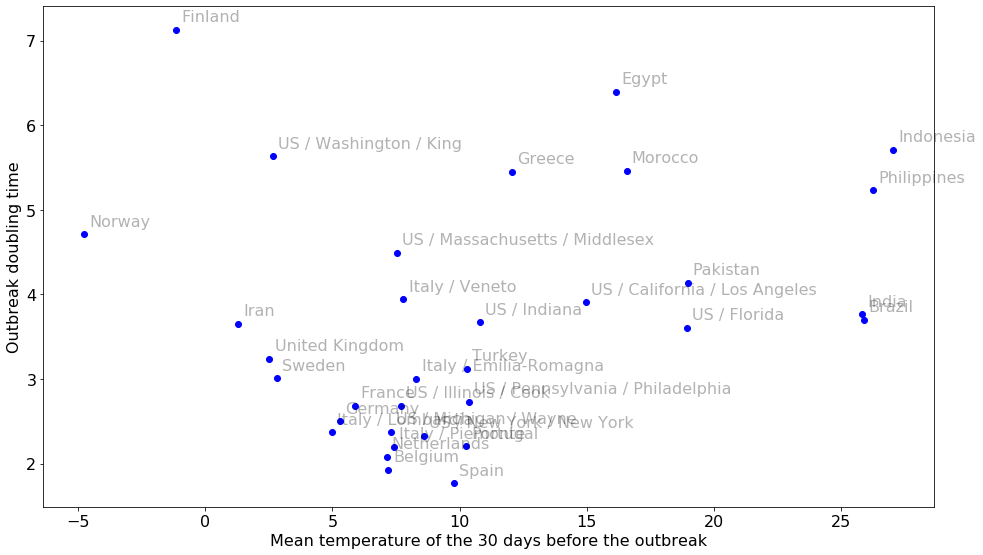

In [29]:
xx = [tas.sel(time=o['start'], lat=o['lat'], lon=o['lon'] % 360., method='nearest') for o in outbreaks_fits]
locations, yy = zip(*[(o['location'], o['fit'].T_d_days) for o in outbreaks_fits])
plt.scatter(xx, yy, color='blue')
for l, x, y in zip(locations, xx, yy):
    plt.annotate(l, (x + 0.2, y + 0.1), alpha=0.3)
plt.xlabel('Mean temperature of the 30 days before the outbreak')
plt.ylabel('Outbreak doubling time')
plt.tight_layout()

In [ ]:
f, ax = covid19.plot.subplots(subplot_kw={'yscale': 'log'})
for o in sorted(outbreaks_fits, key=lambda x: x['fit'].T_d_days):
    covid19.plot.plot_fit(ax, o['fit'].shift(np.datetime64('2020-02-01') - o['fit'].t_0), label=o['location'], extrapolate=(np.datetime64('2020-01-30'), +2))
    covid19.plot.plot_data(ax, deaths_outbreaks.sel(location=o['location']), delay=np.datetime64('2020-02-01') - o['fit'].t_0, alpha=0.2, color='gray')

_ = ax.legend(bbox_to_anchor=(1.2, -.1))
_ = ax.set(xlim=(np.datetime64('2020-01-29'), np.datetime64('2020-04-10')))

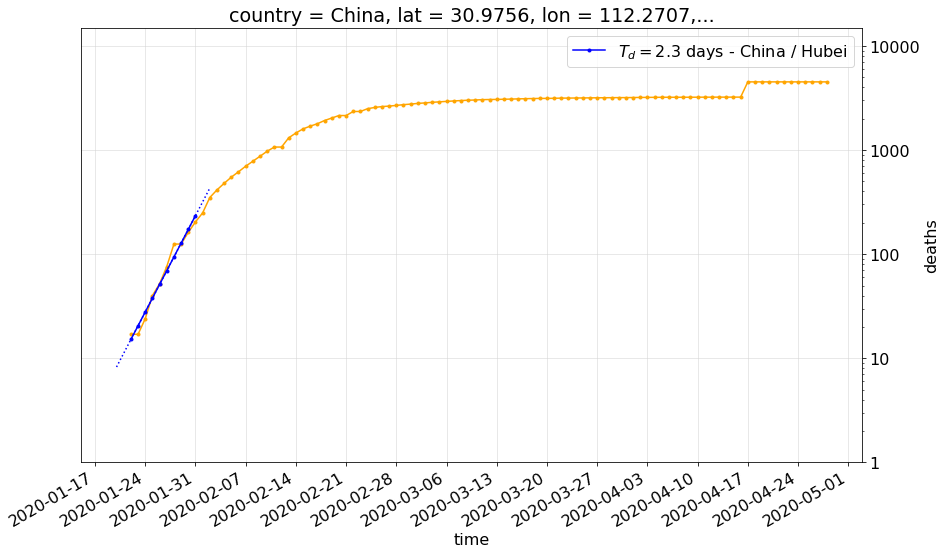

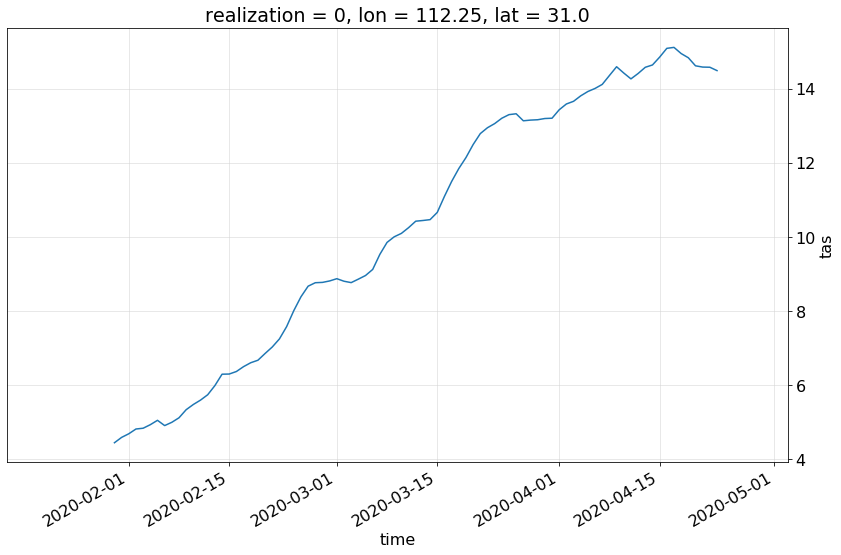

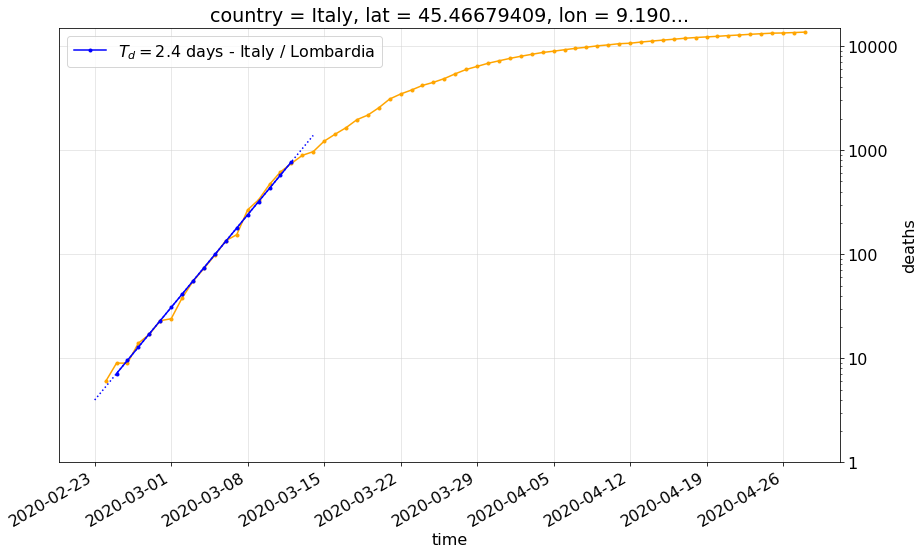

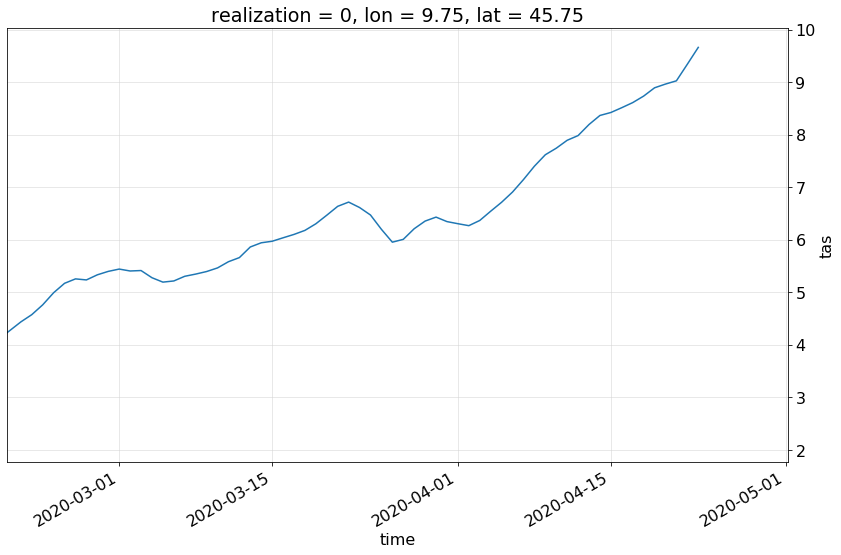

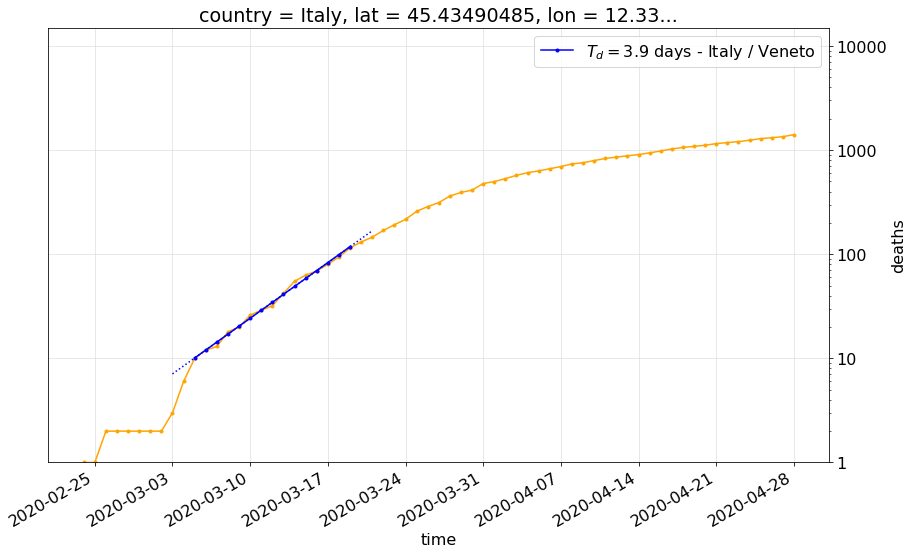

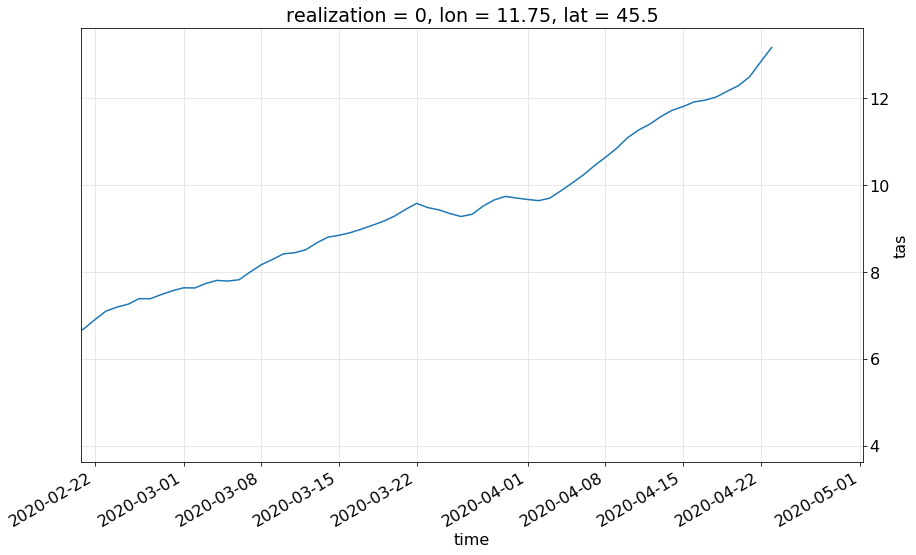

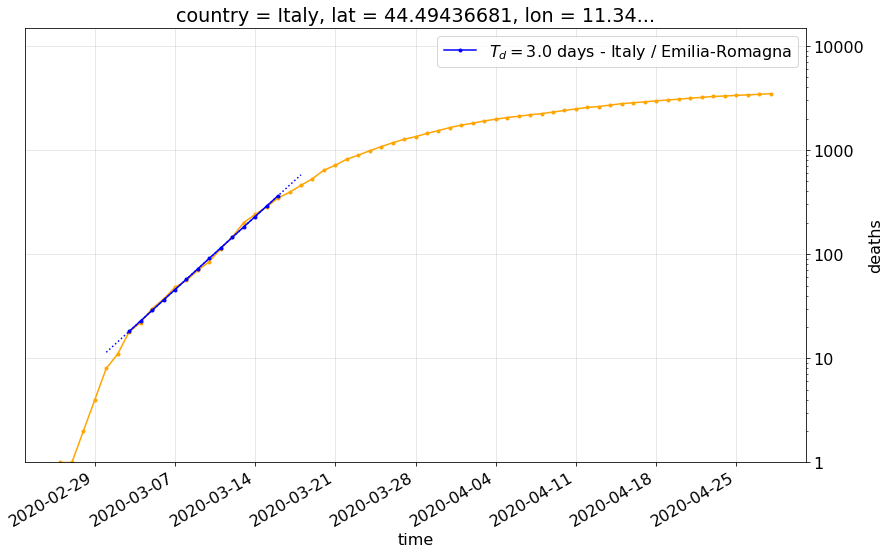

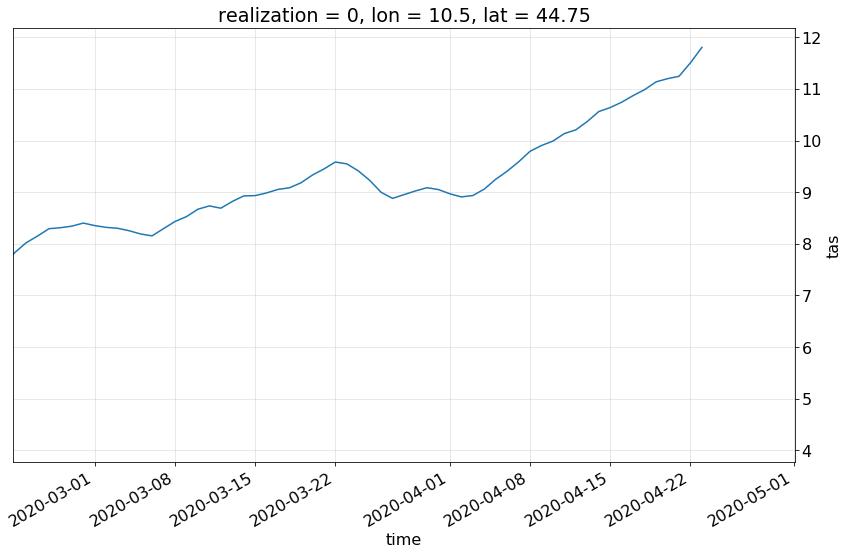

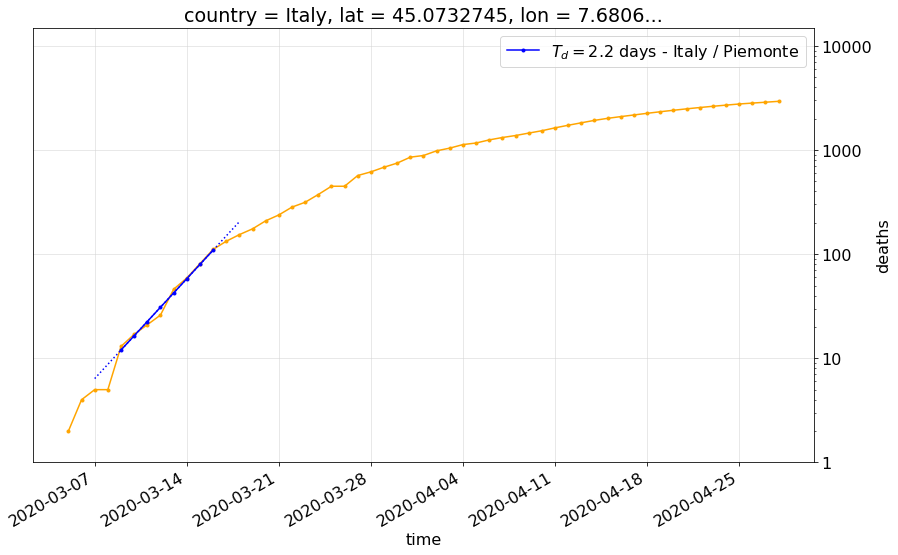

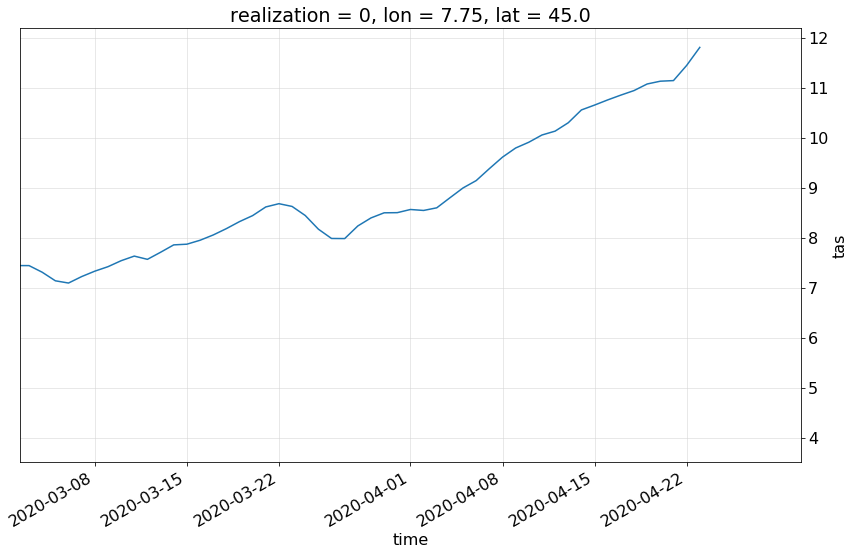

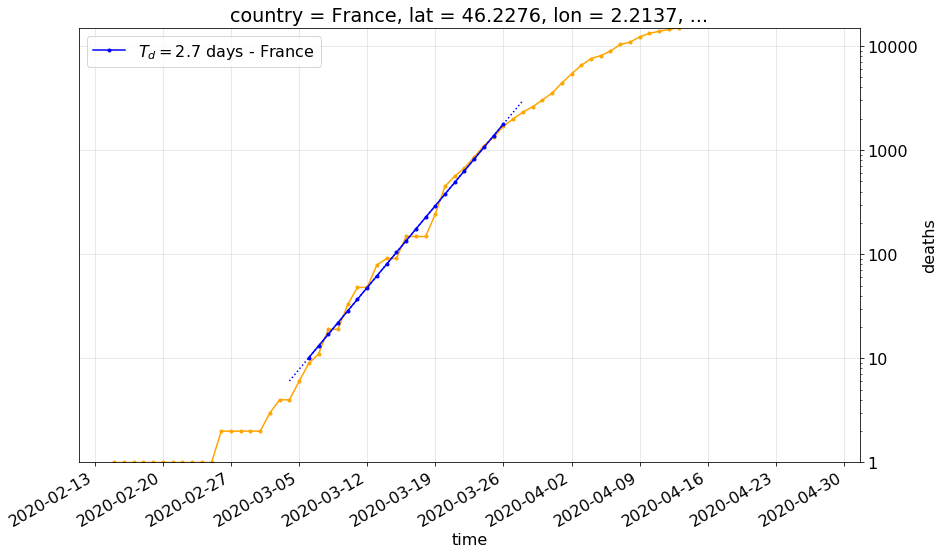

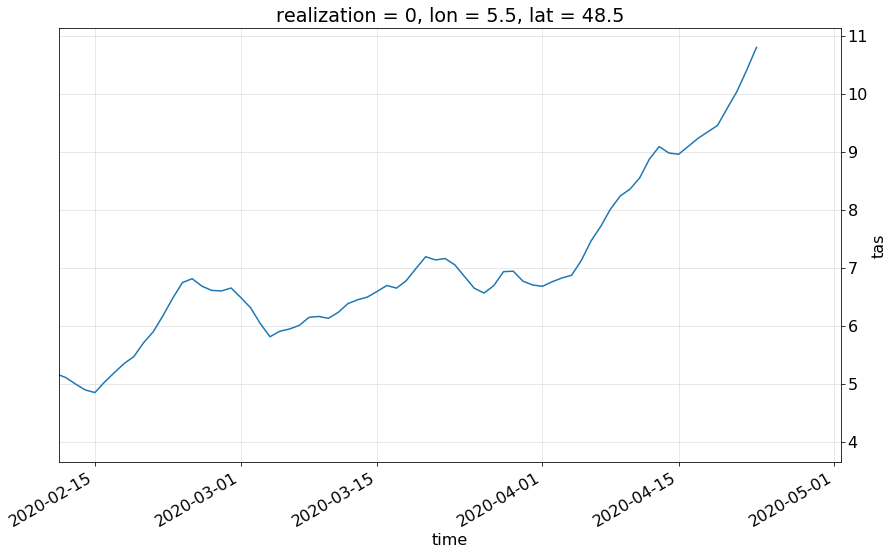

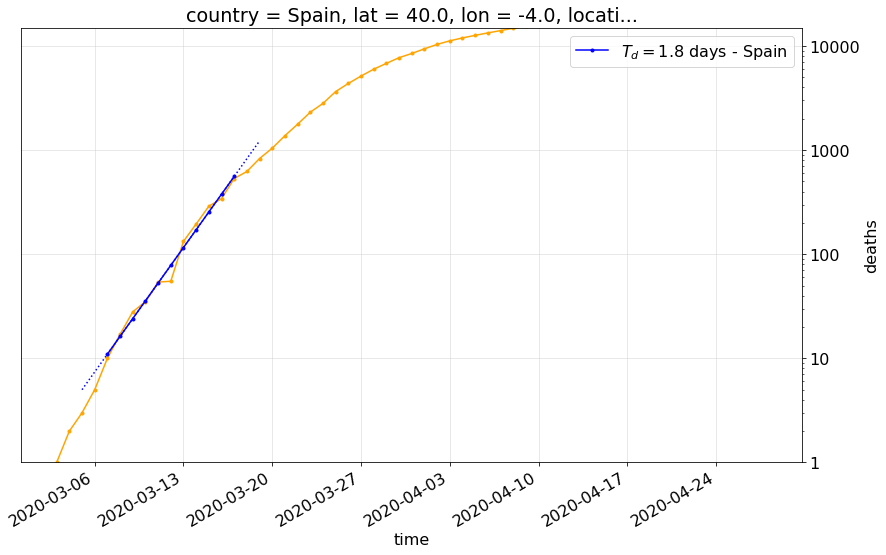

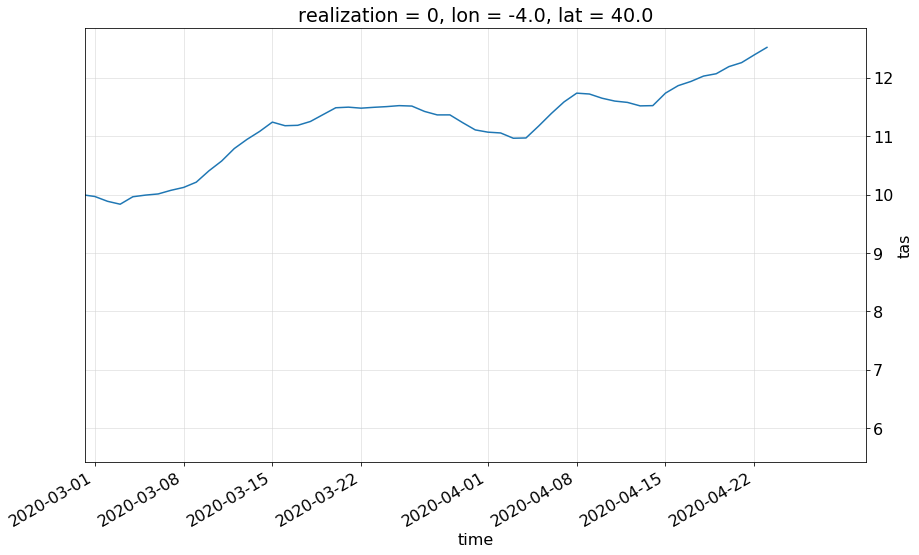

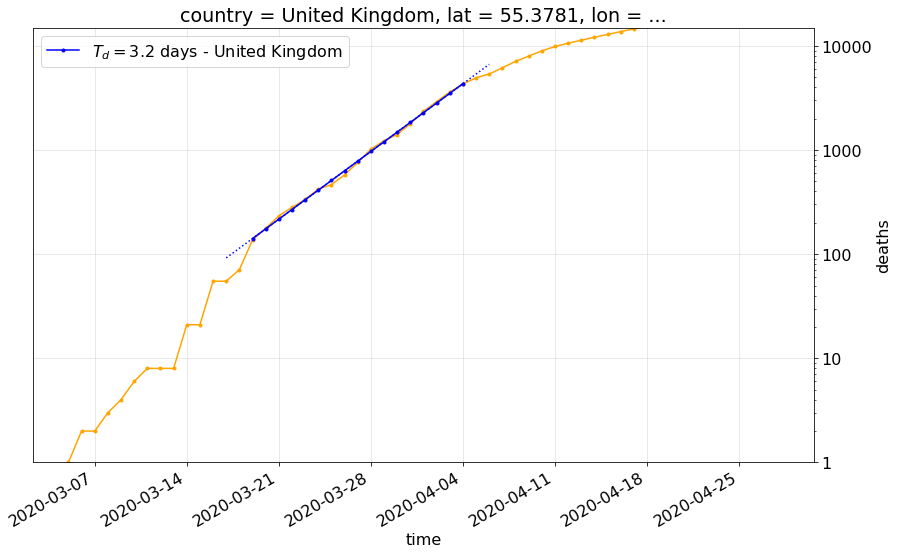

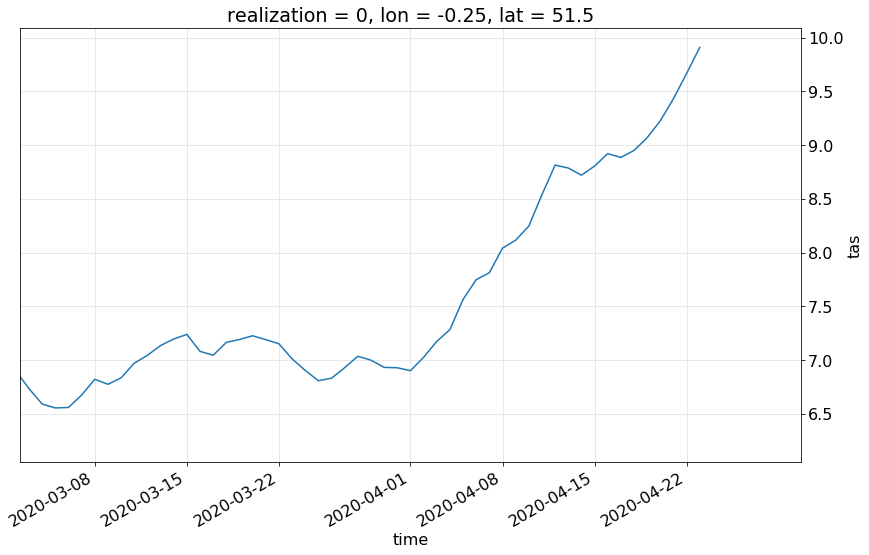

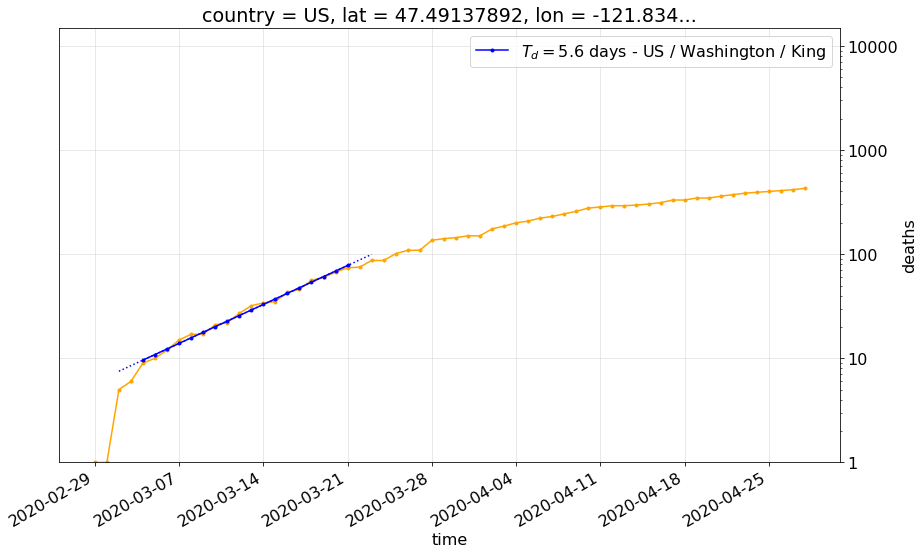

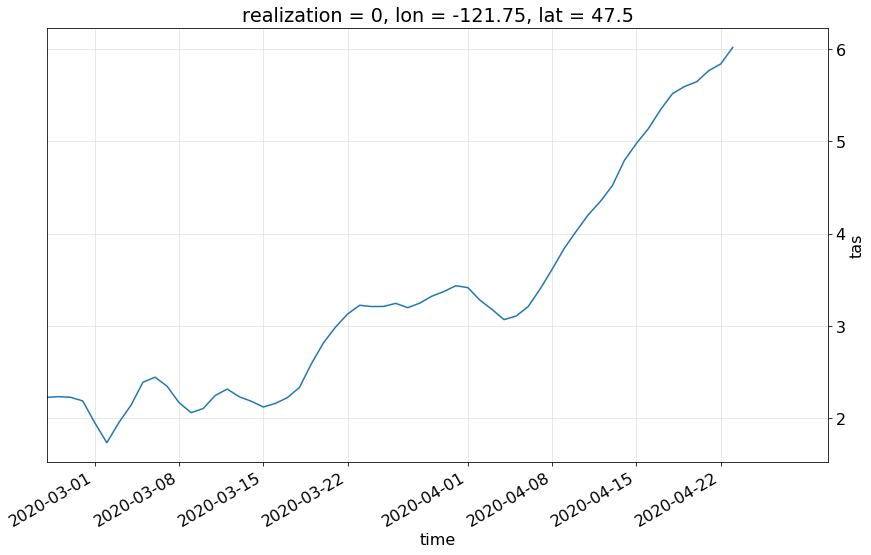

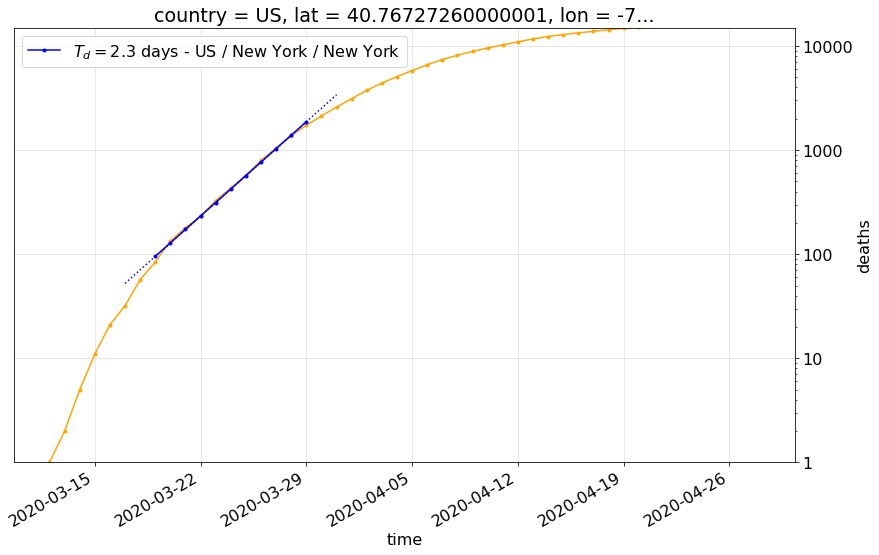

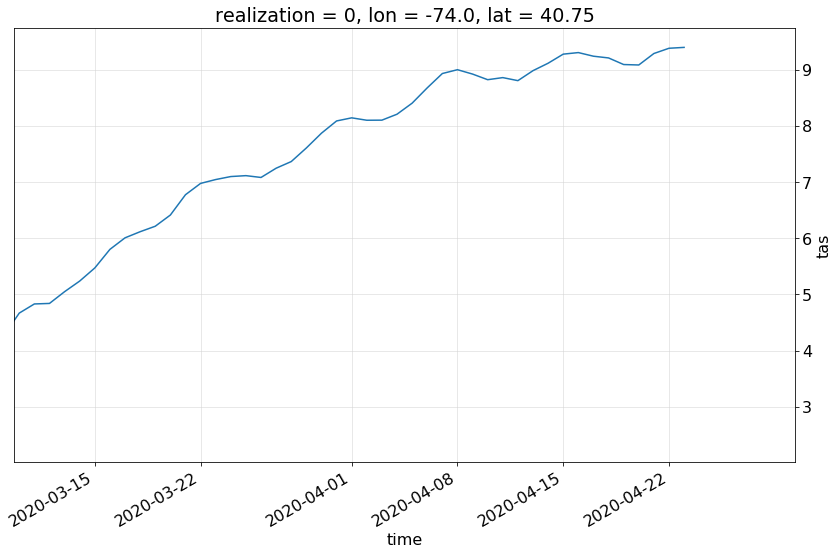

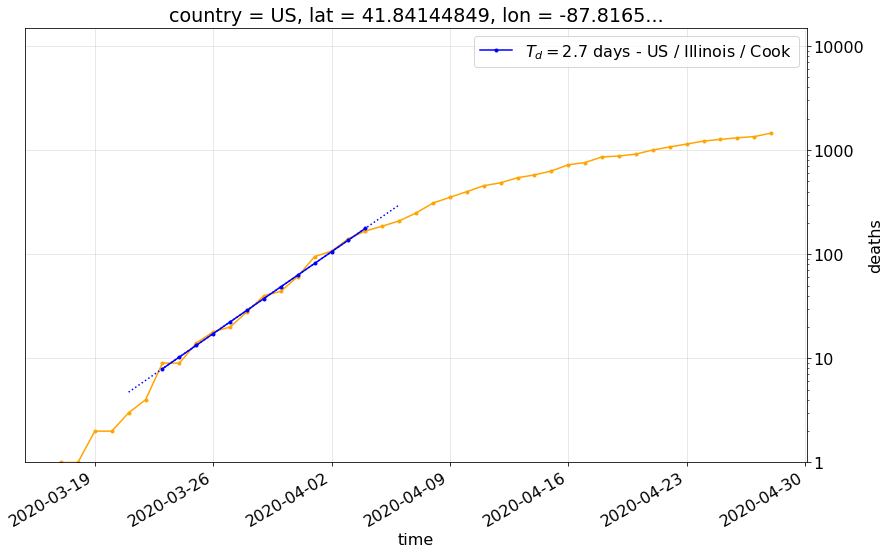

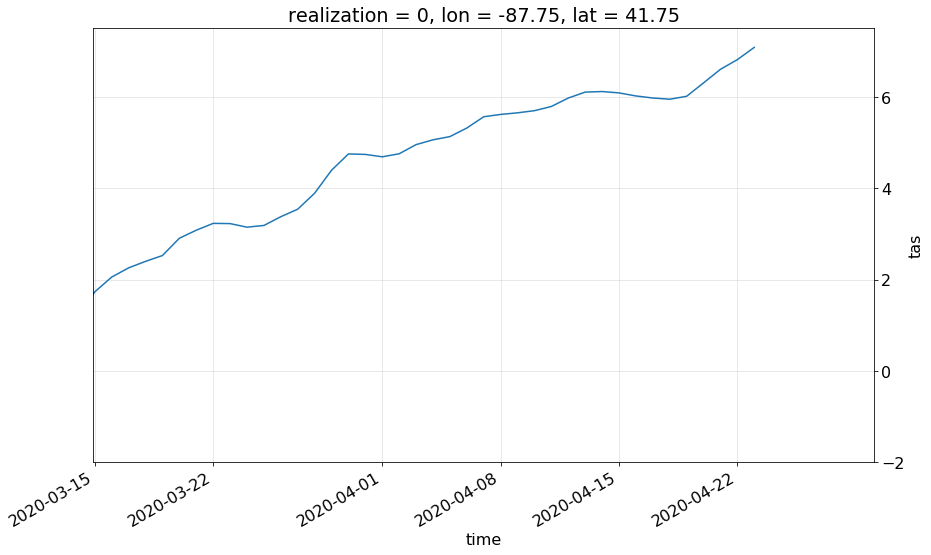

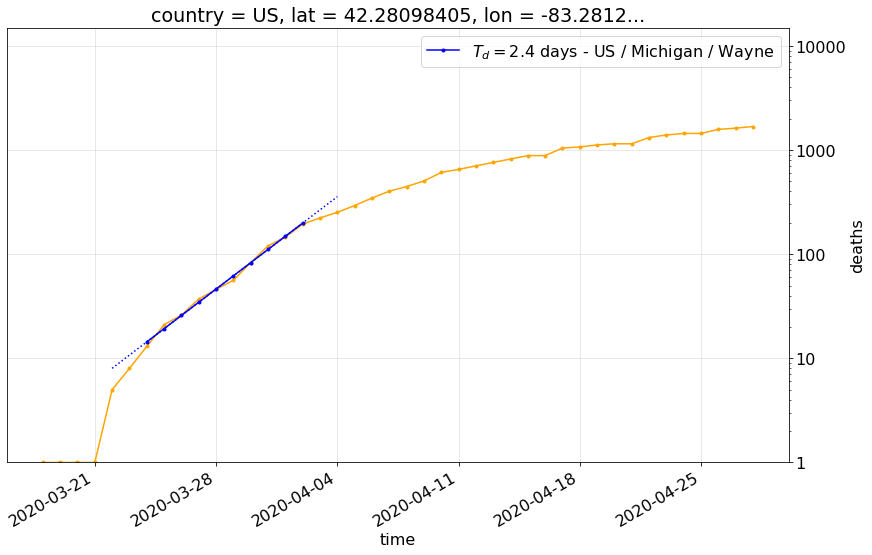

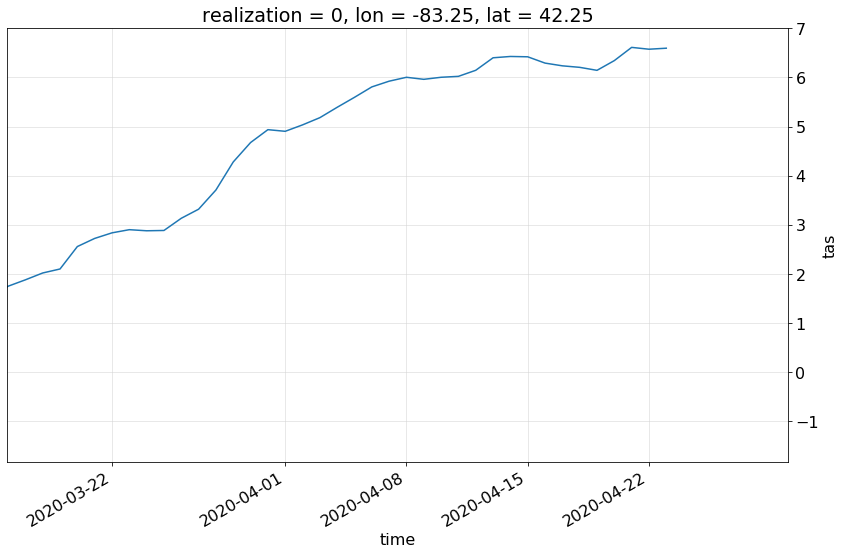

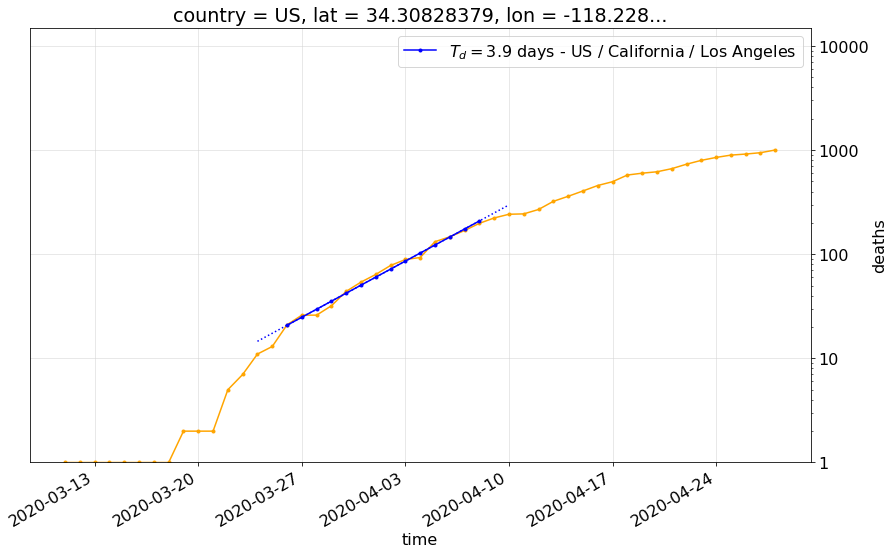

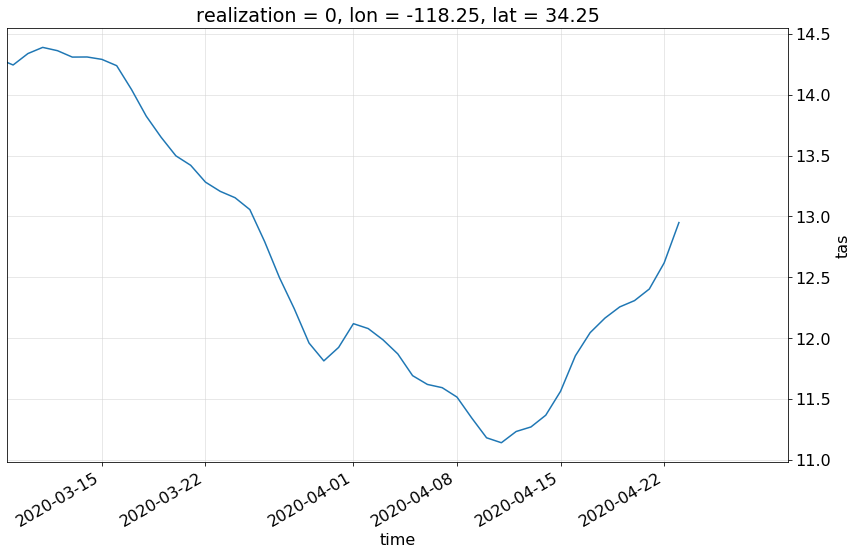

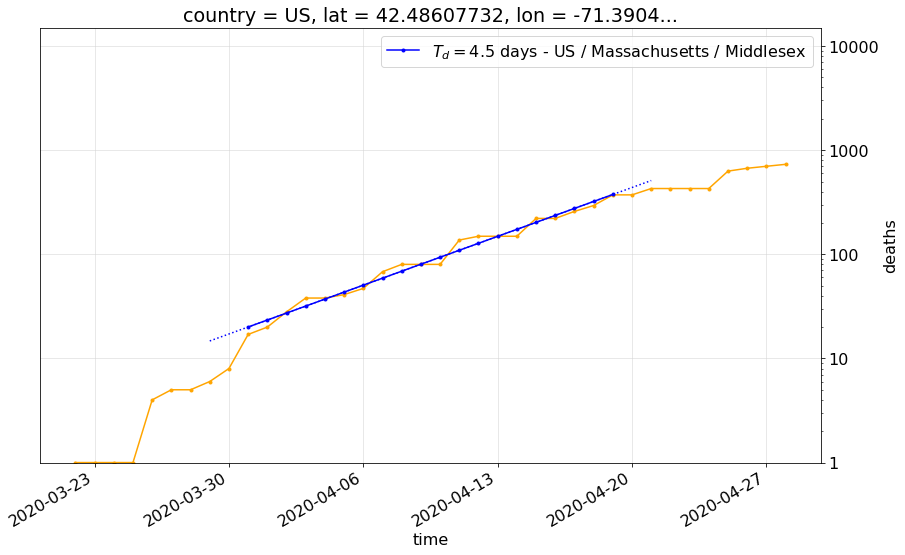

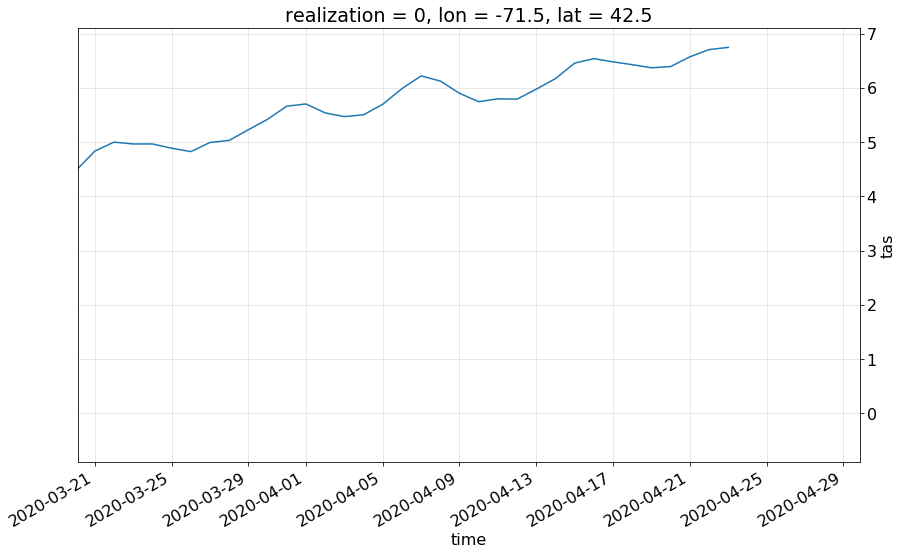

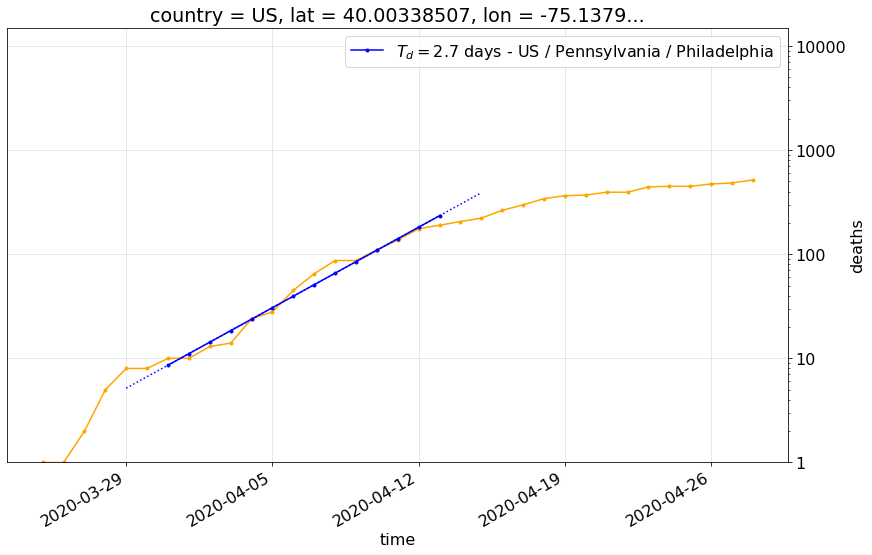

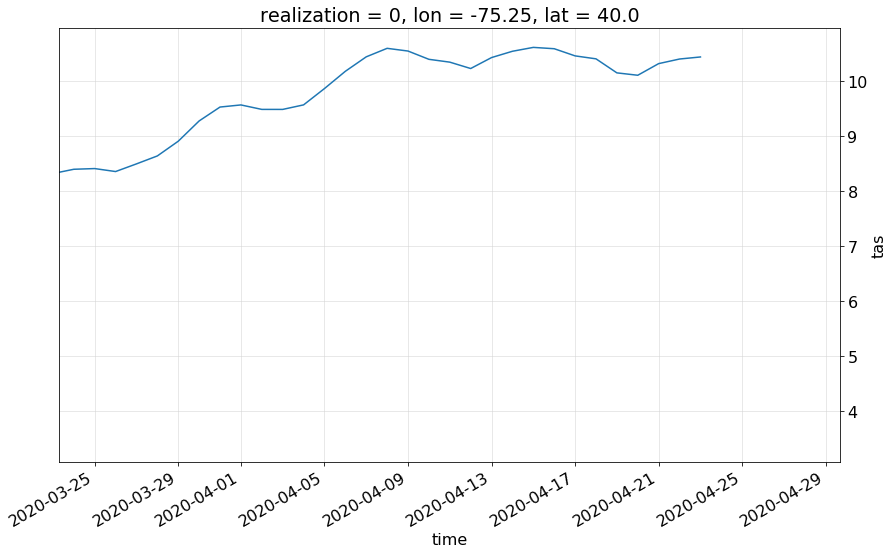

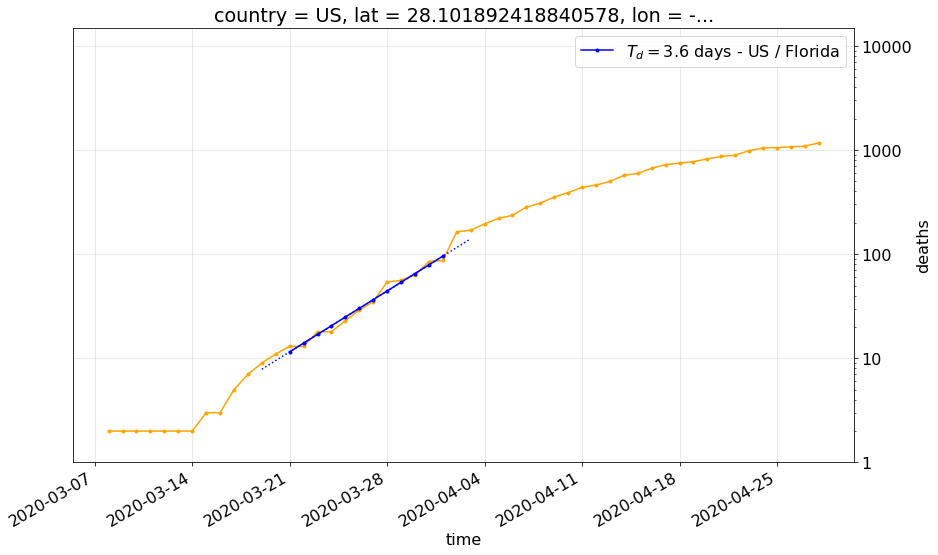

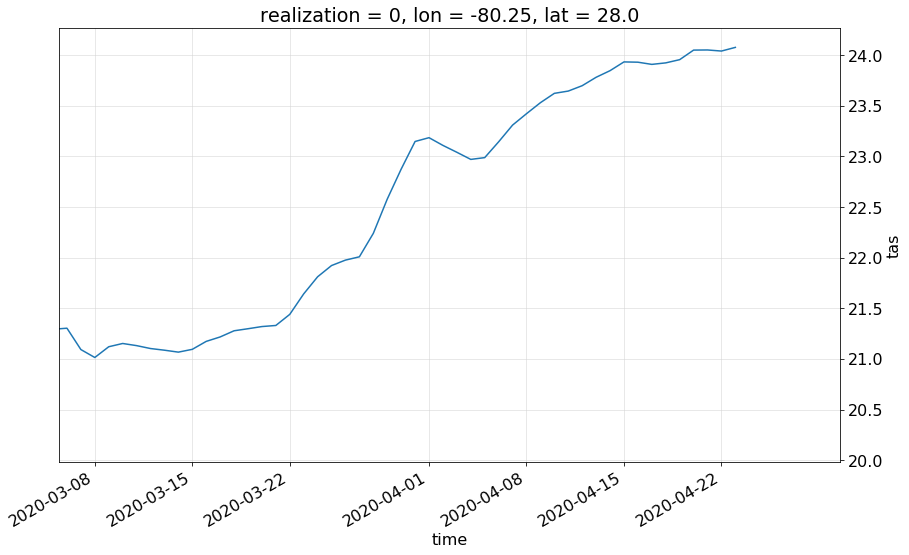

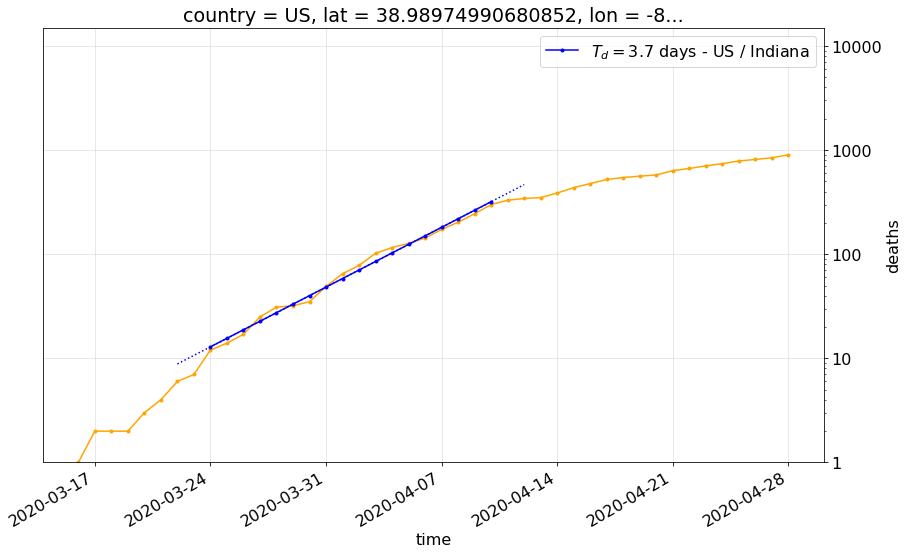

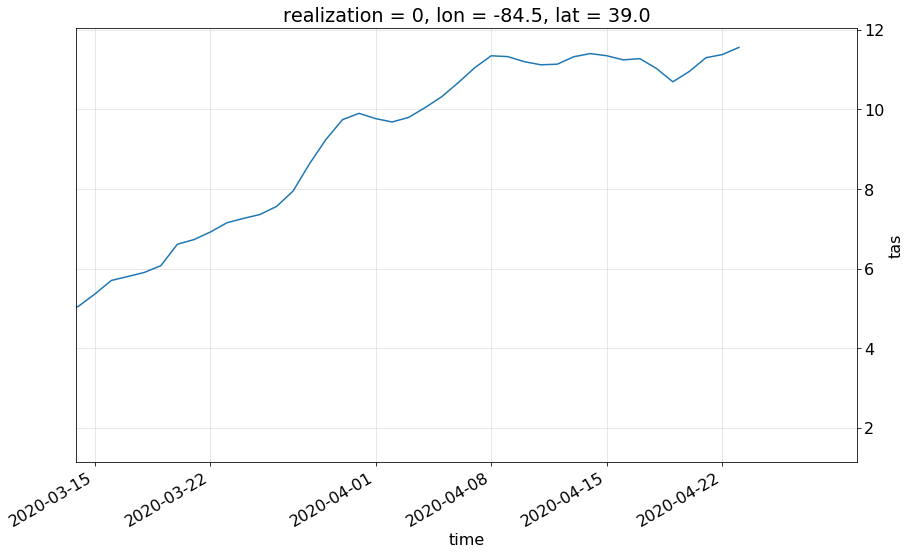

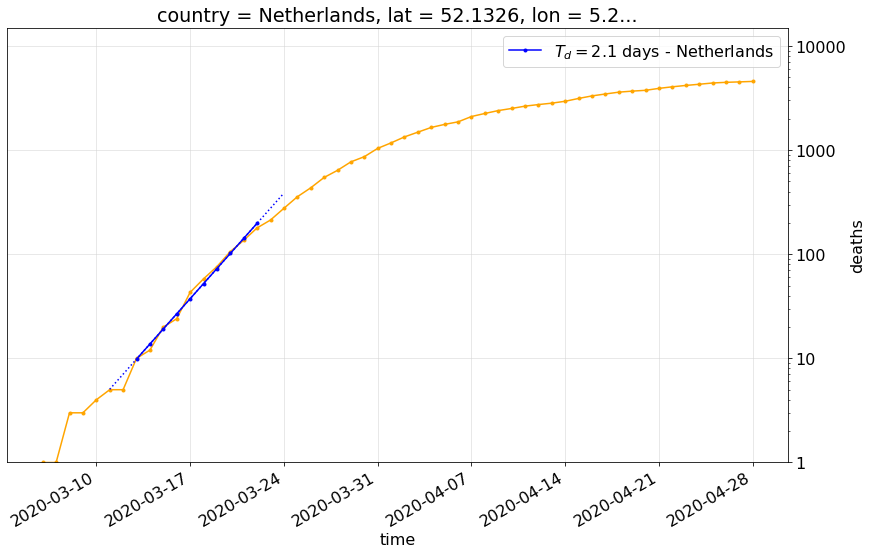

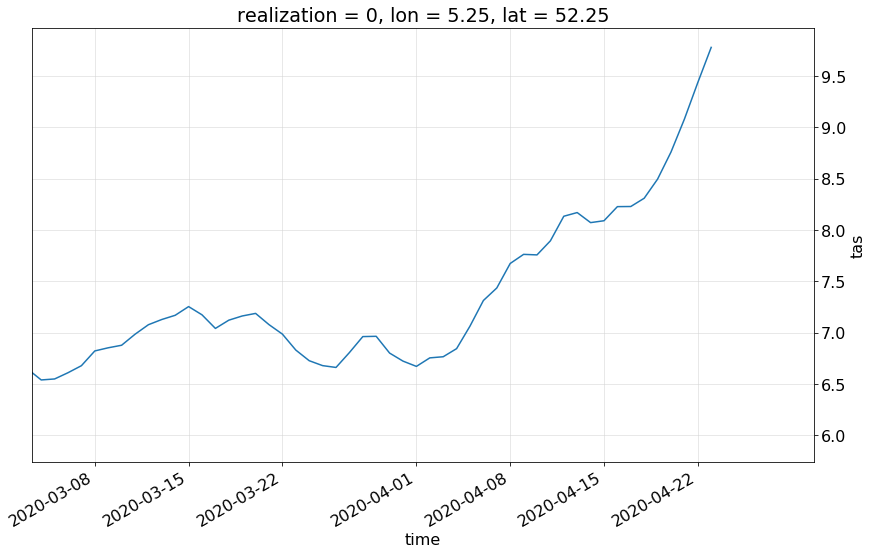

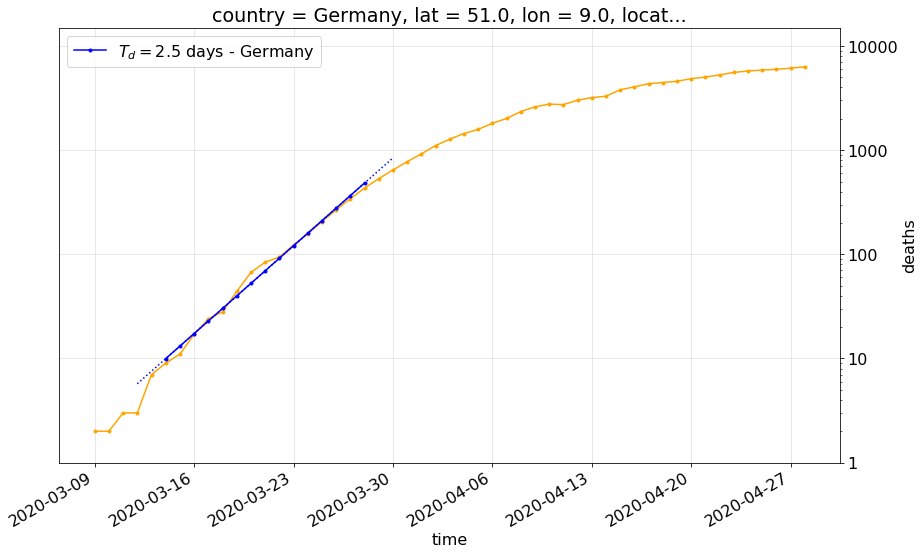

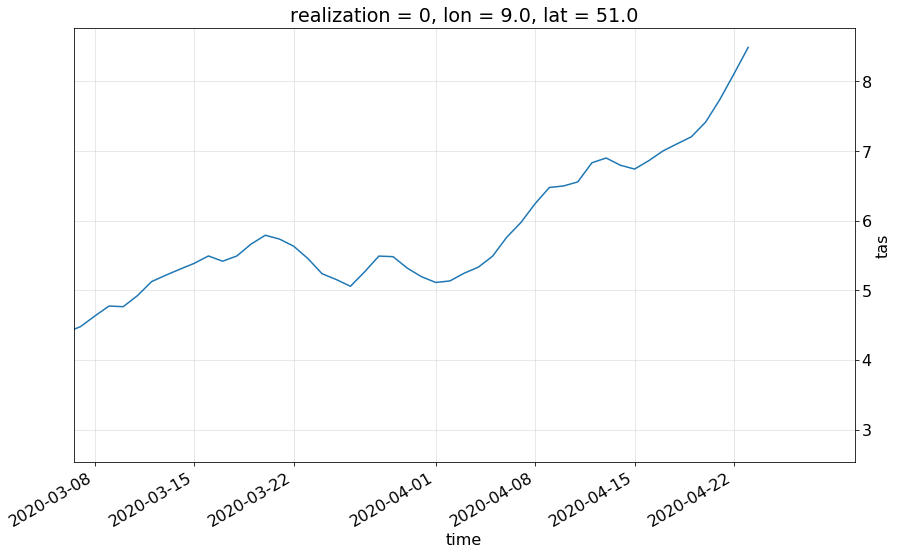

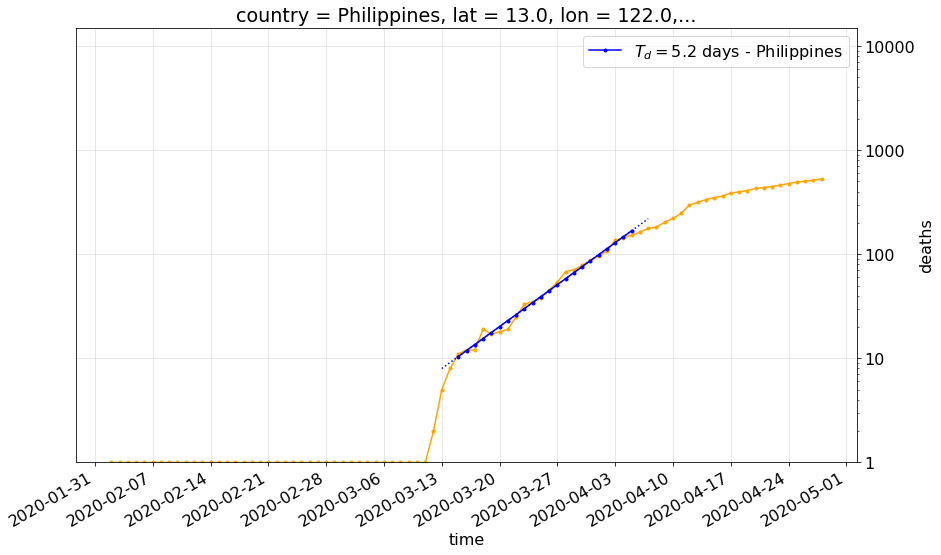

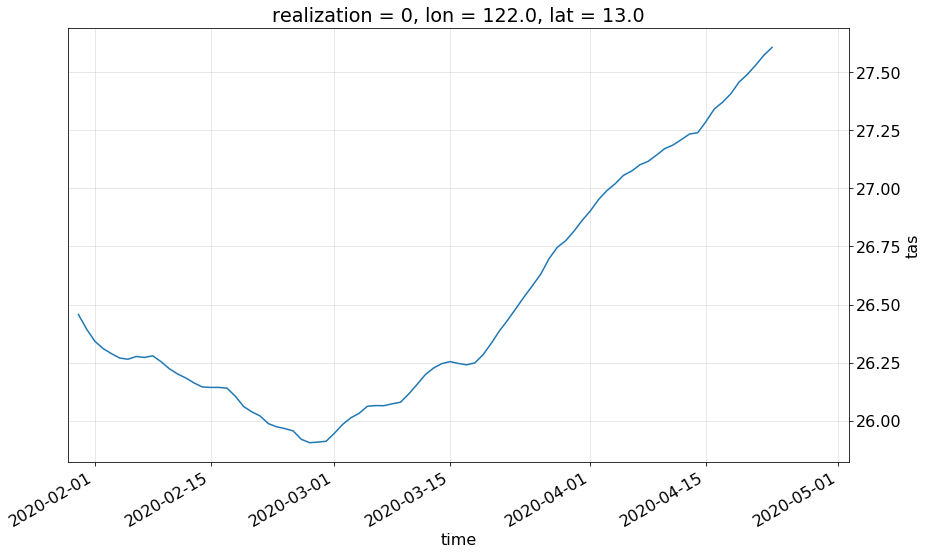

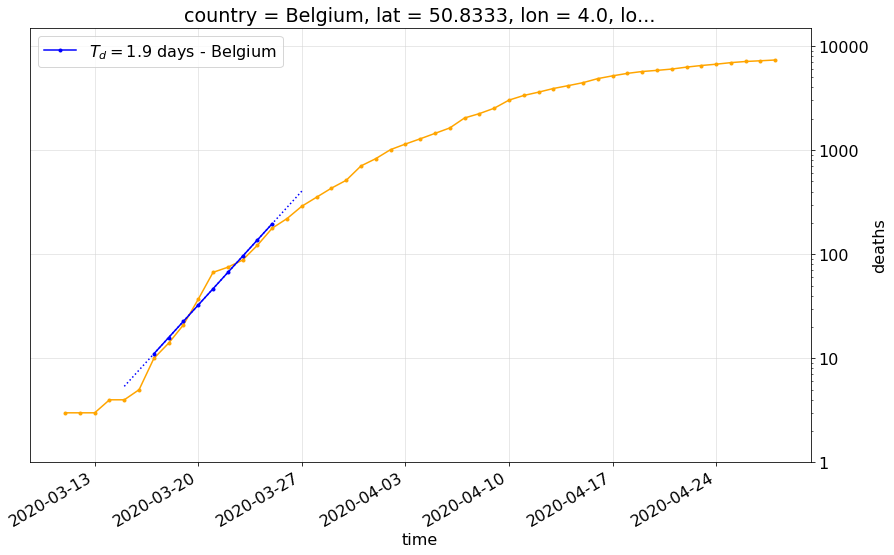

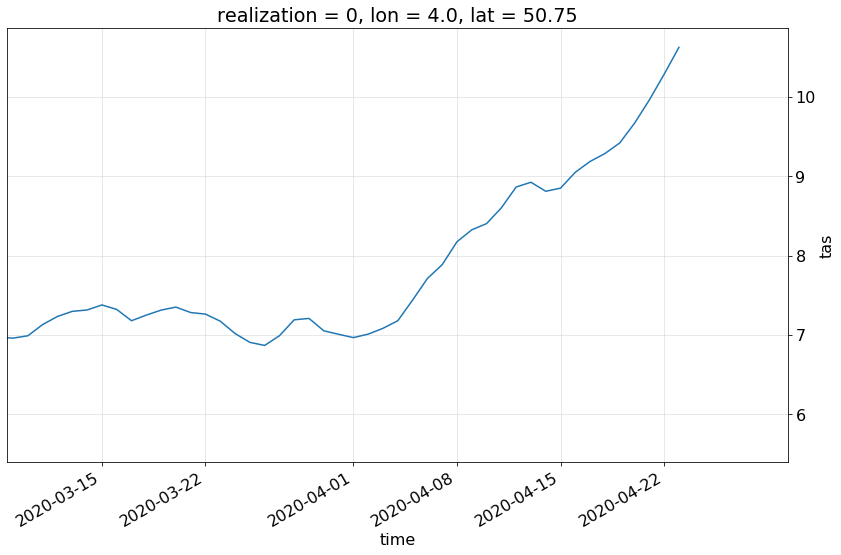

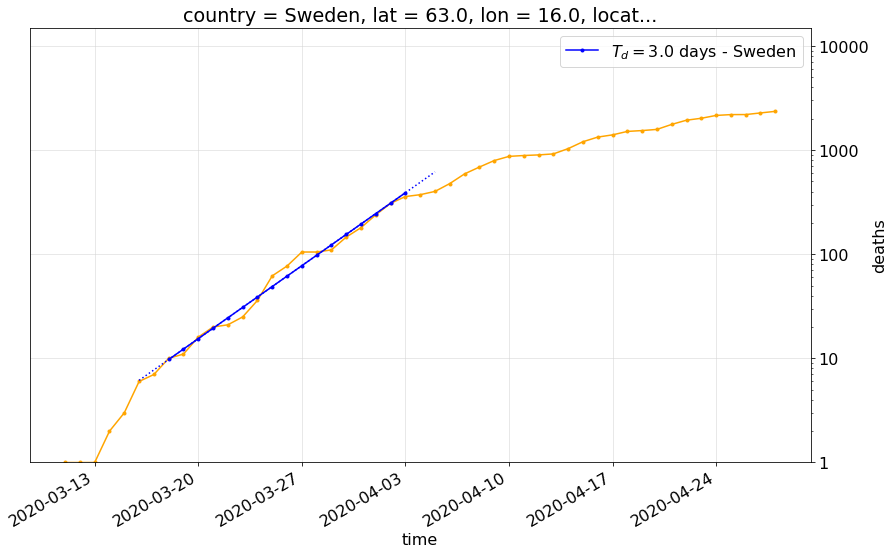

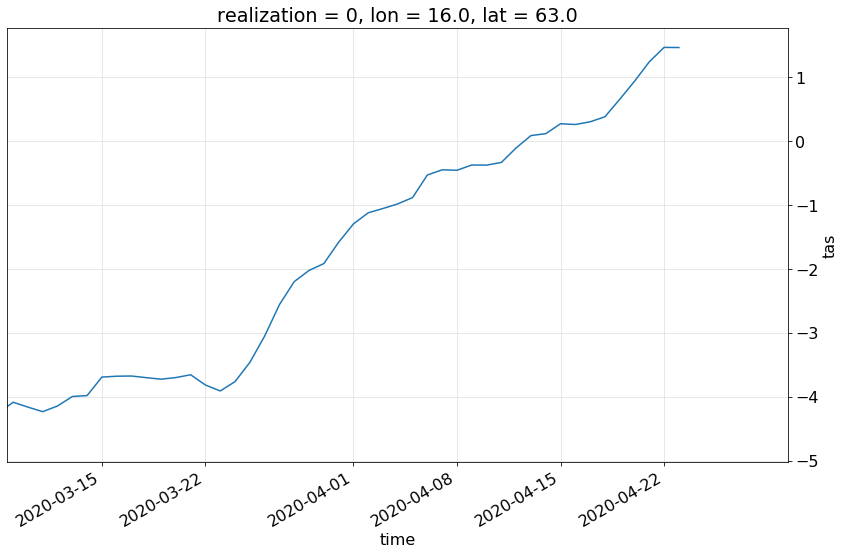

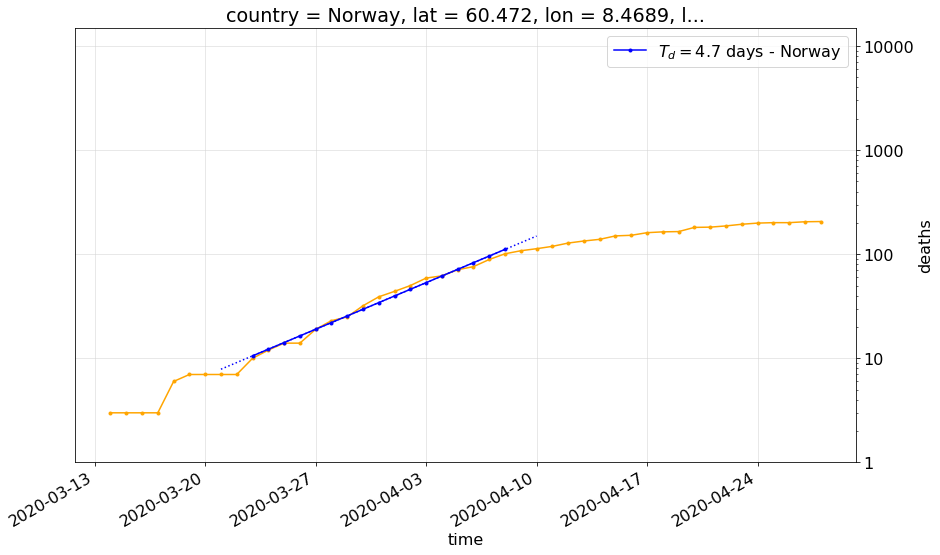

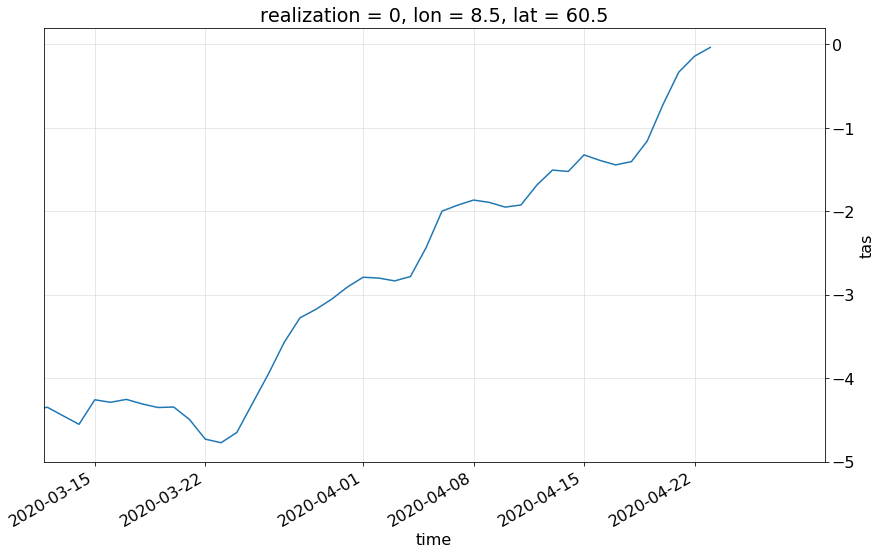

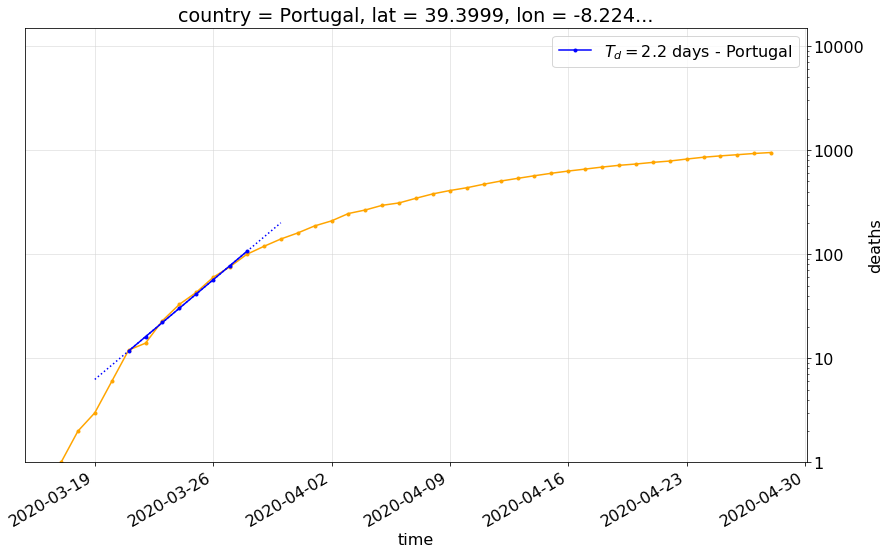

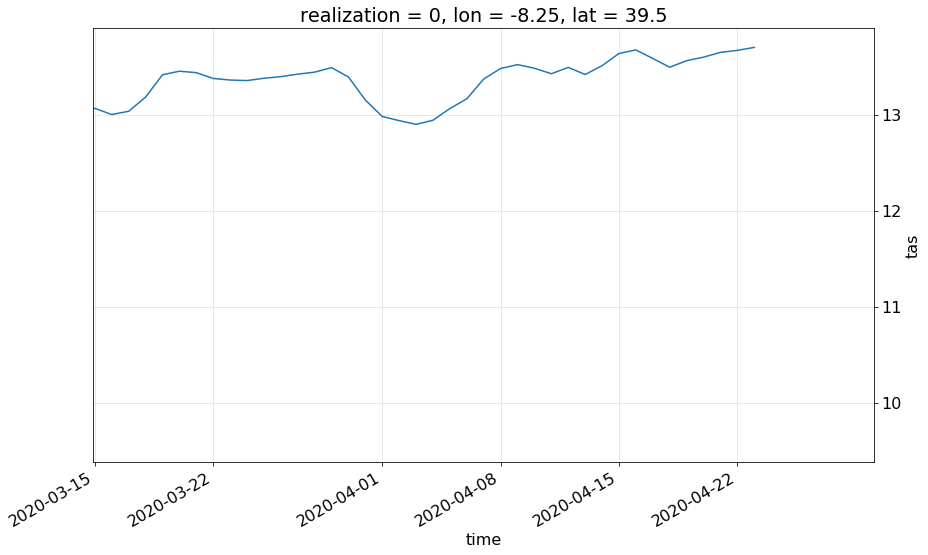

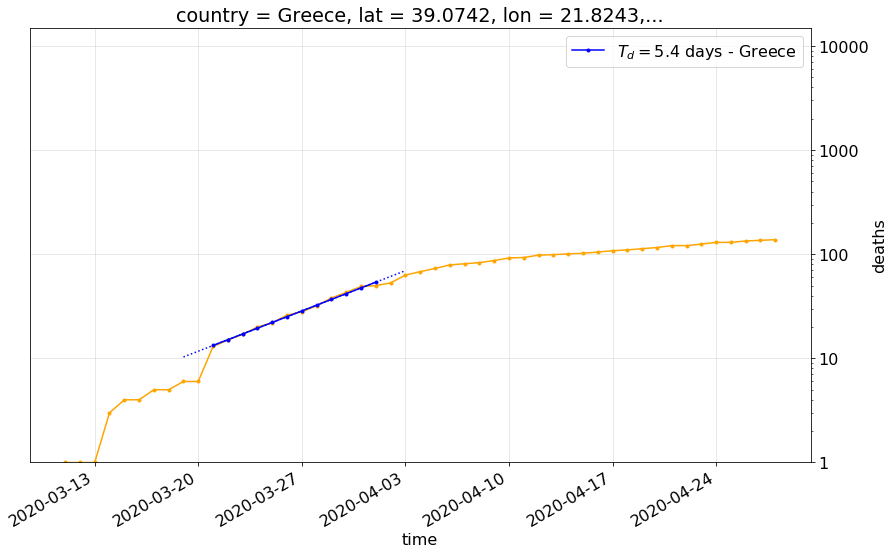

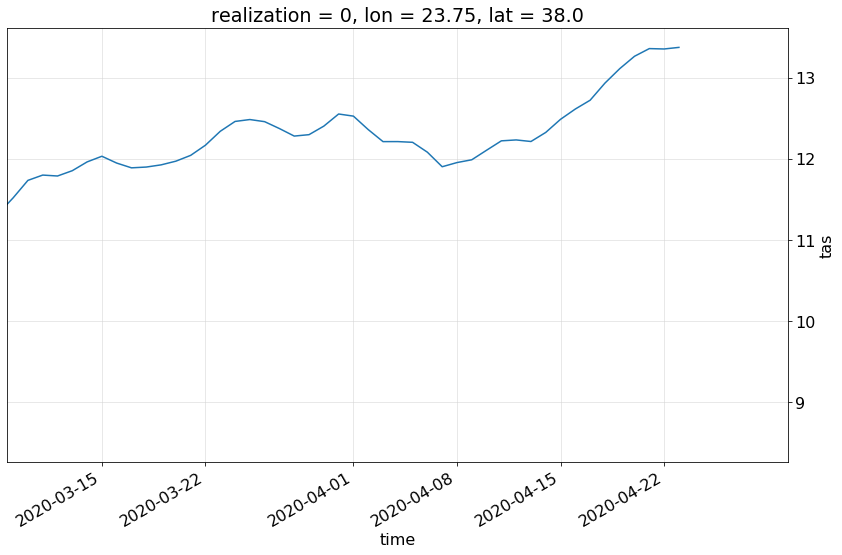

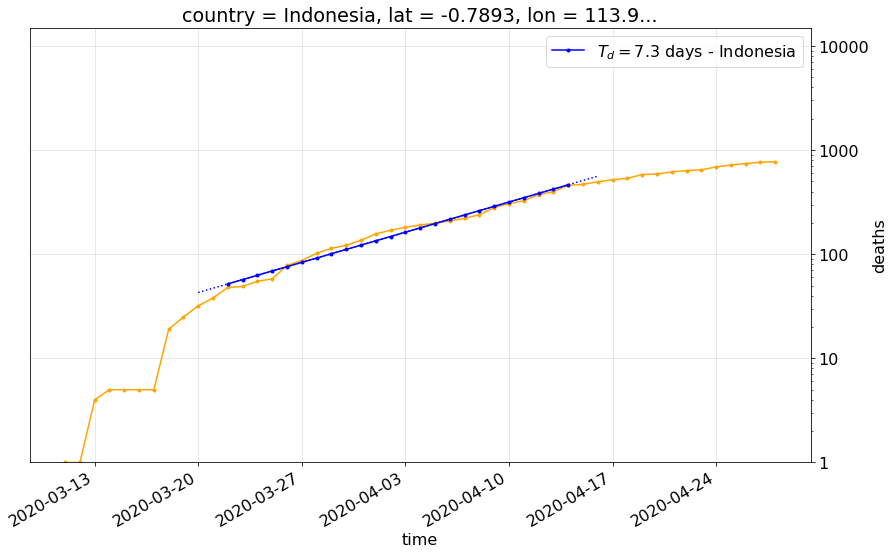

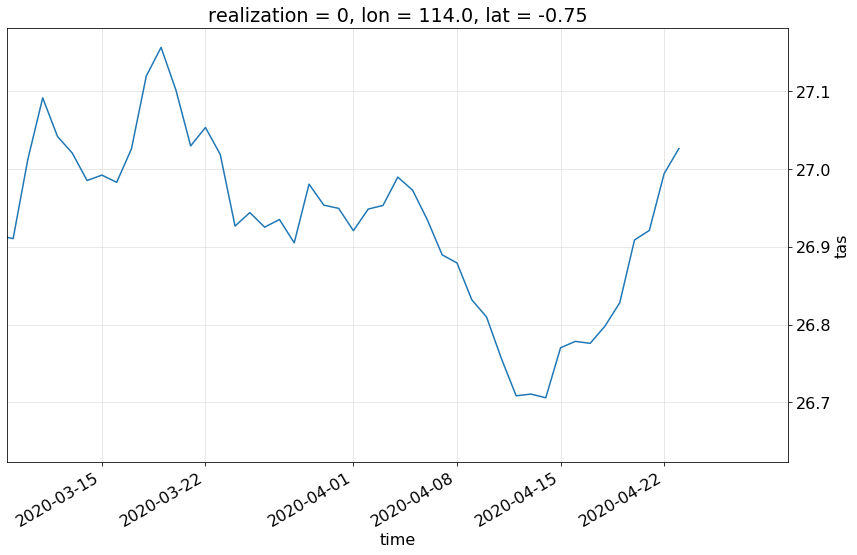

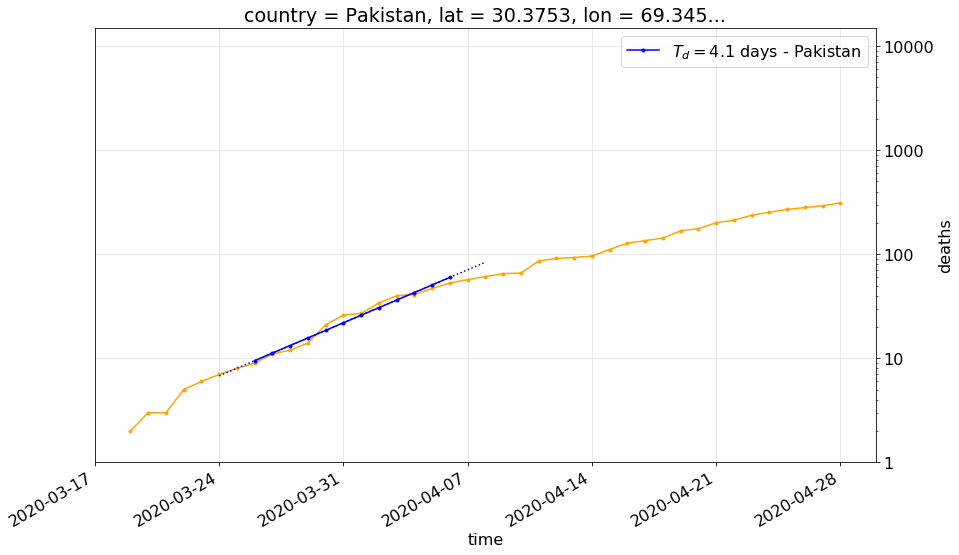

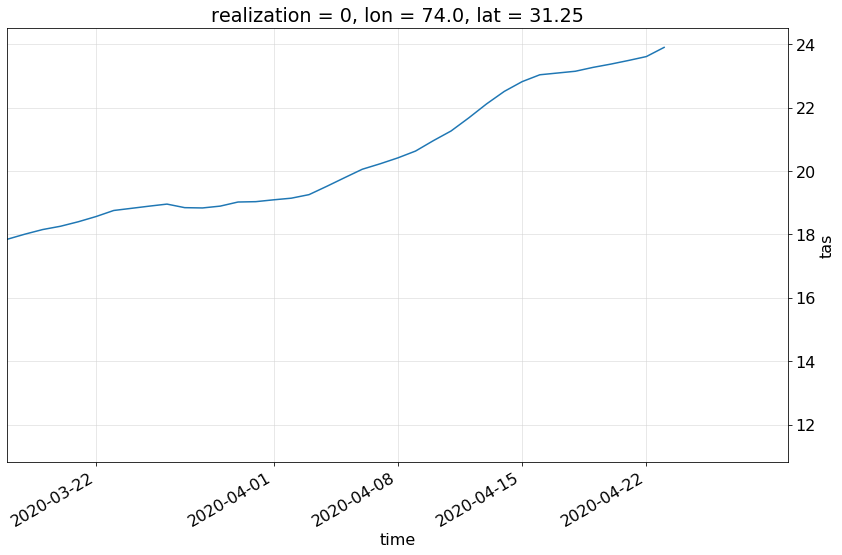

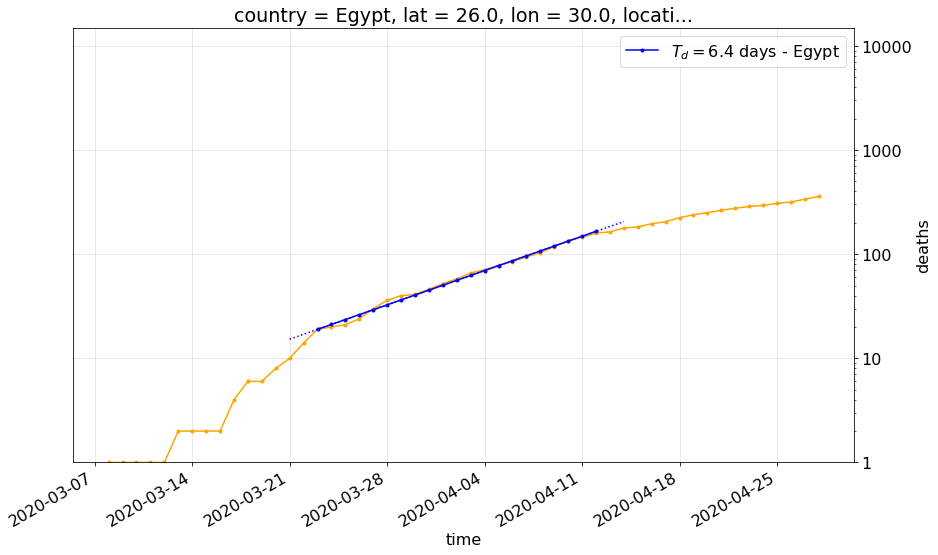

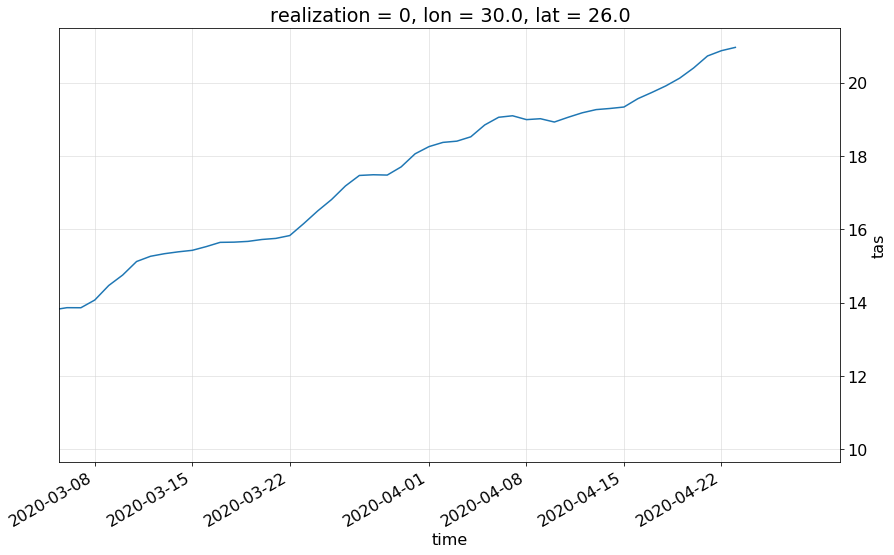

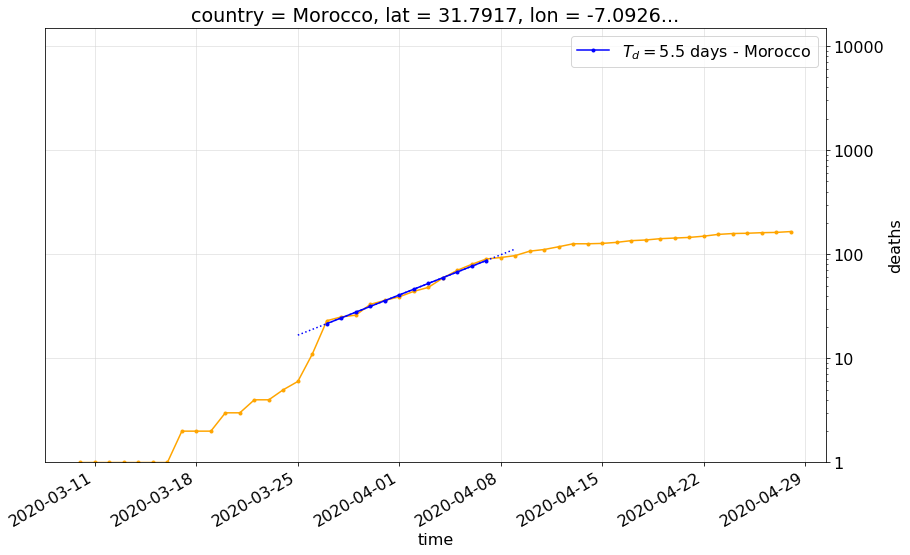

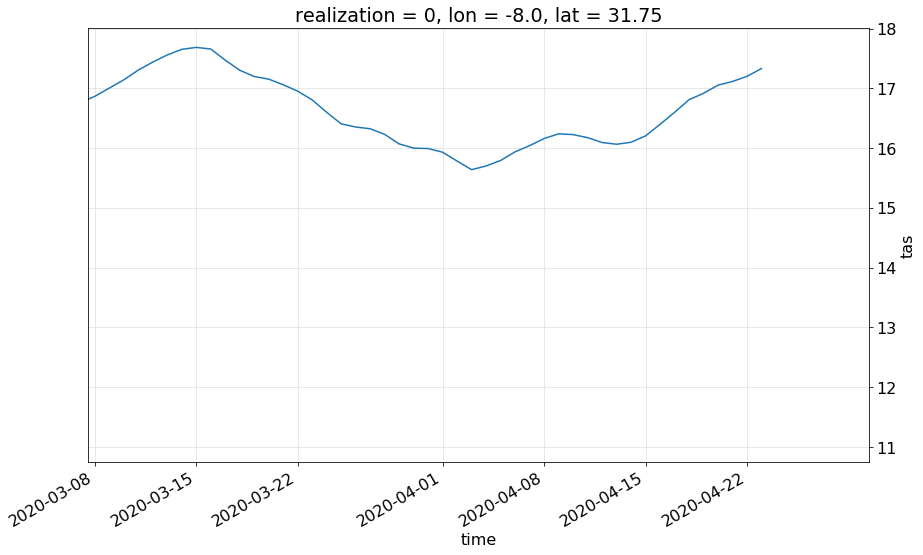

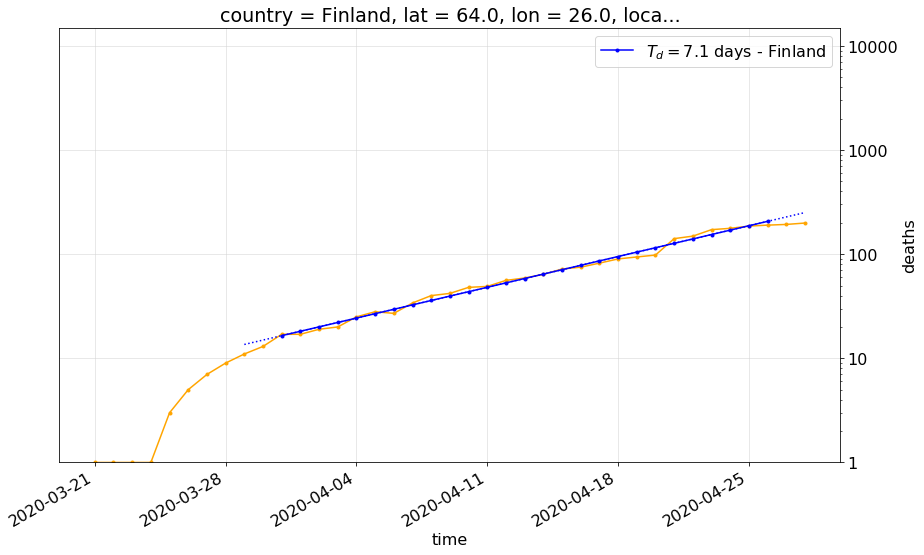

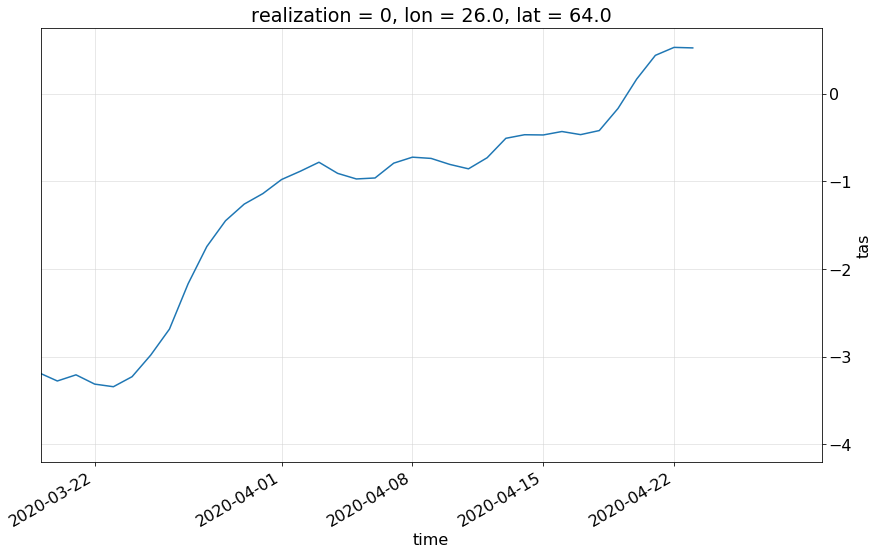

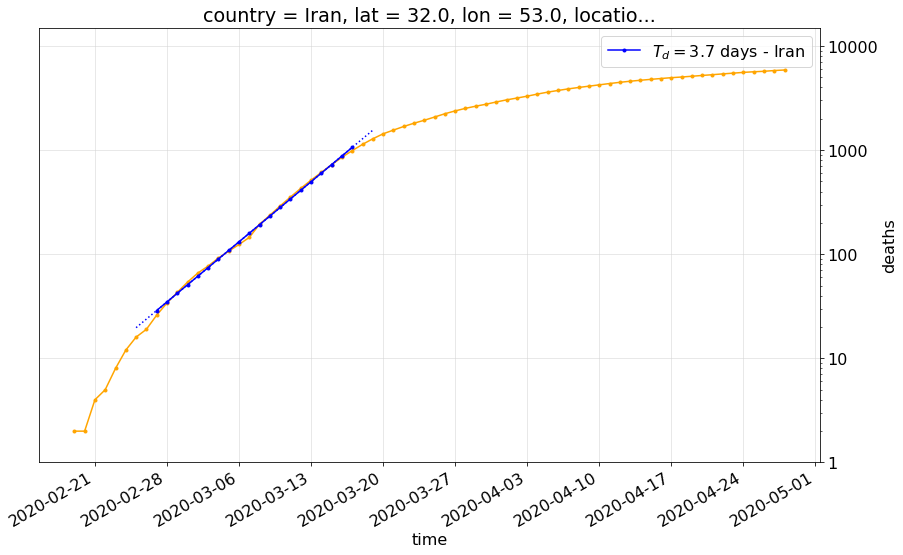

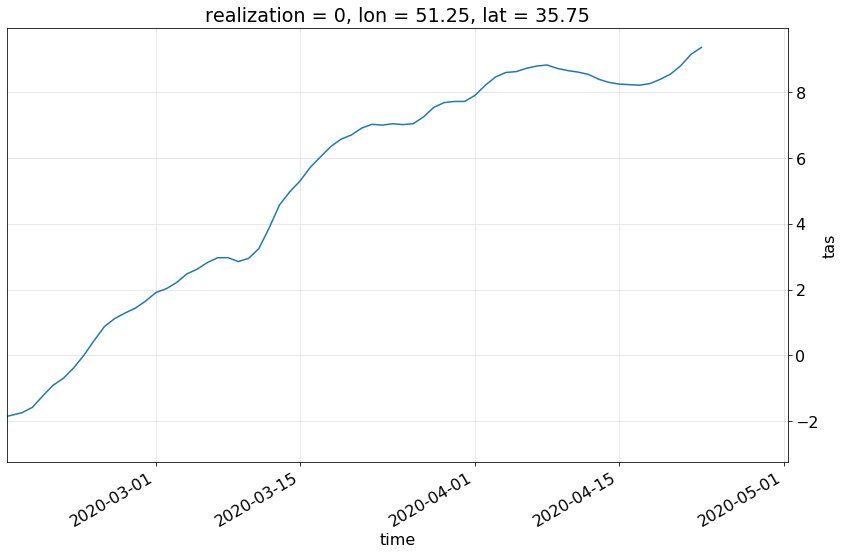

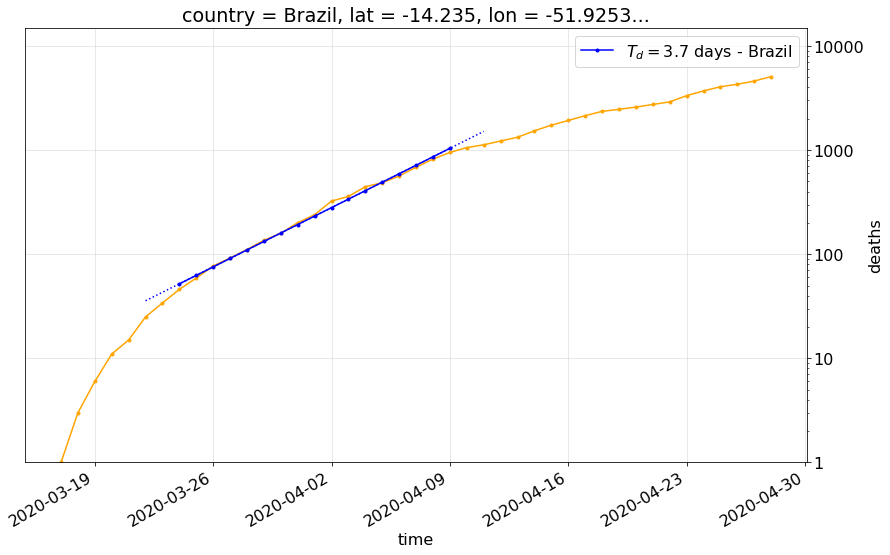

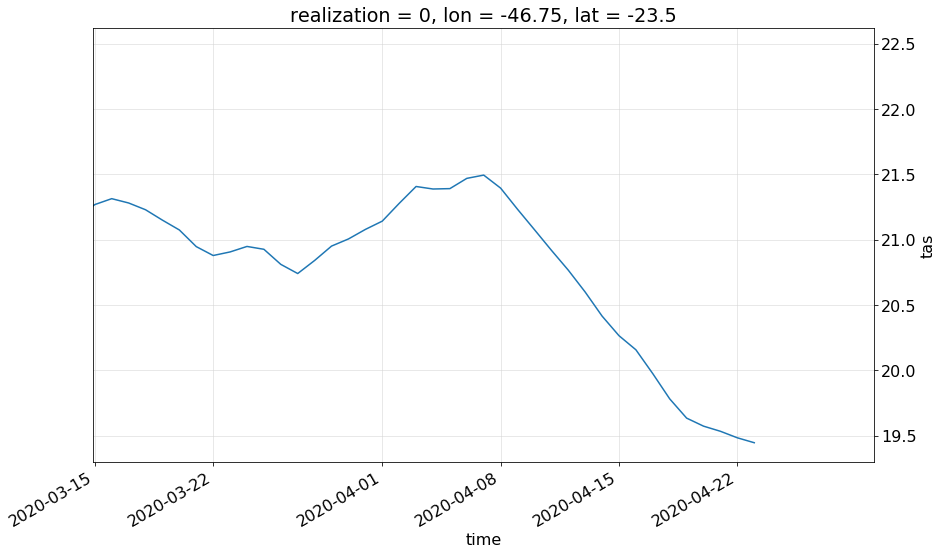

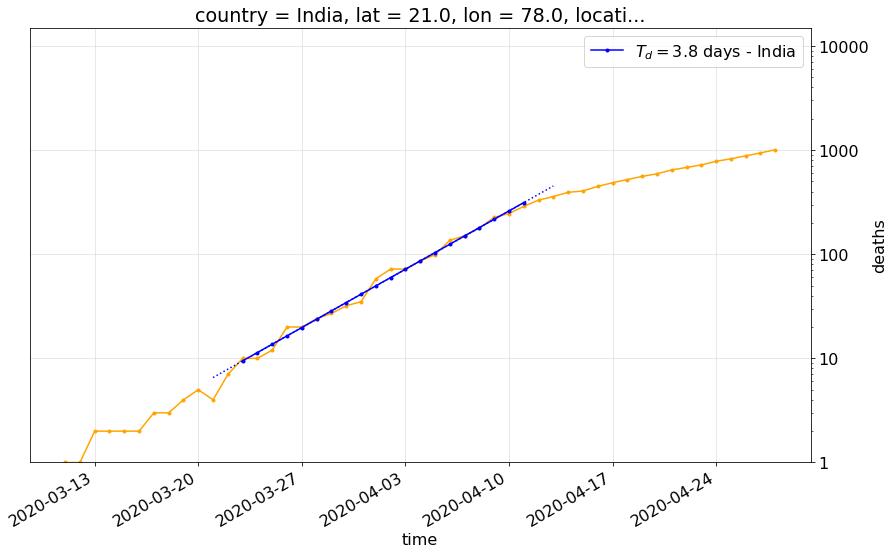

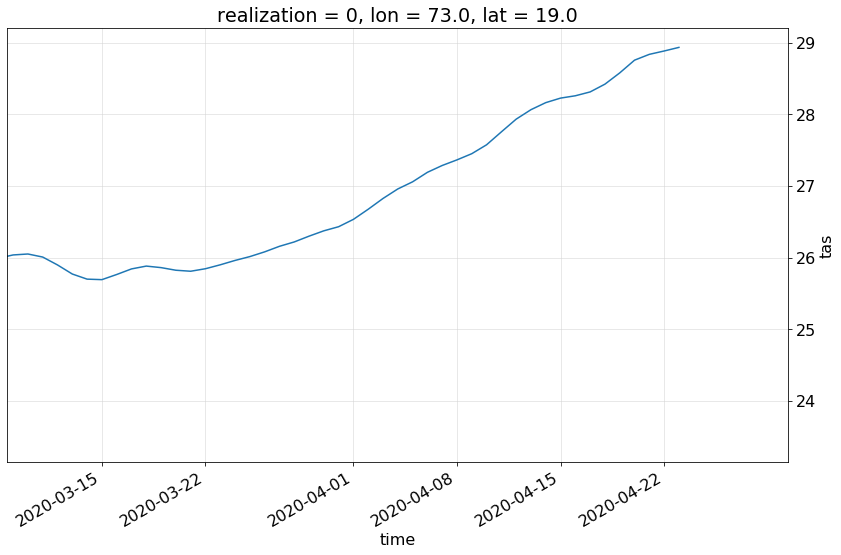

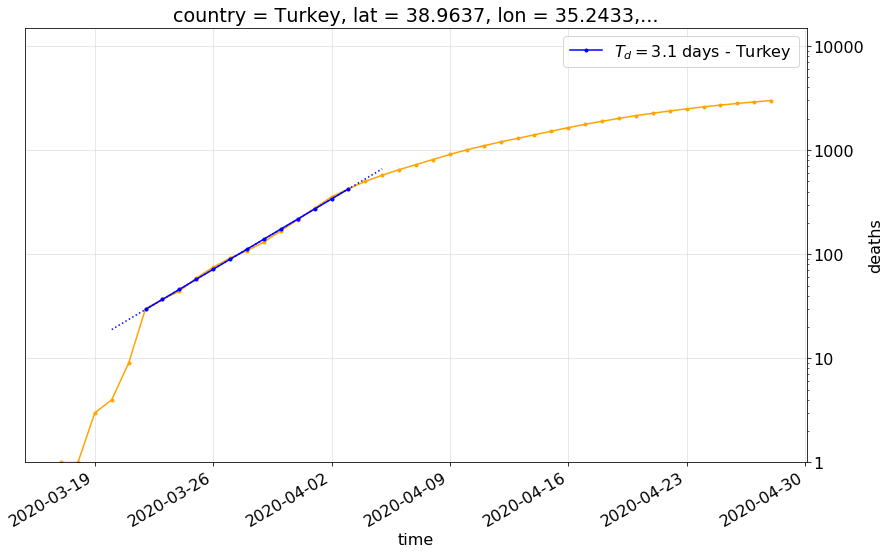

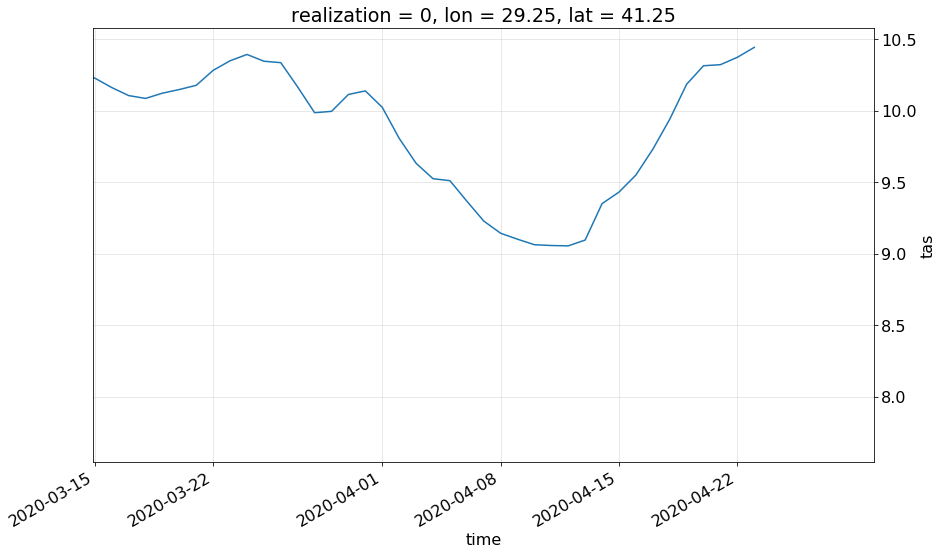

In [15]:
deaths_exponential_outbreaks = covid19.data.read_outbreaks_metadata('c3s-covid-19-data - deaths-exponential-outbreaks.csv')
outbreaks_fits = covid19.fit.fit_exponential_outbreaks([deaths_outbreaks], deaths_exponential_outbreaks)

for o in outbreaks_fits:
    f, ax = covid19.plot.subplots(subplot_kw={'yscale': 'log', 'ylim': (1, 15000)})
    data = deaths_outbreaks.sel(location=o['location'])
    covid19.plot.plot_data(ax, data, marker='o', markersize=3, color='orange')
    covid19.plot.plot_fit(ax, o['fit'], label=o['location'], color='blue')
    _ = ax.legend()
    f, ax1 = covid19.plot.subplots()
    tas.sel(lat=o['lat'], lon=o['lon'], method='nearest').plot(ax=ax1)
    ax1.set(xlim=ax.get_xlim())

In [ ]:
deaths_outbreaks.isel(time=-1).sortby(-deaths_outbreaks.isel(time=-1)).to_dataframe().head(50)

In [ ]:
world.sel(location='Nigeria')